<a href="https://colab.research.google.com/github/aditya3477/rl-assignments/blob/main/assignment1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from tqdm import tqdm
from random import randint, random, choice
from tabulate import tabulate
import pickle
import pandas as pd

In [3]:
class Environment(gym.Env):
    
    def __init__(self,env_choice):
        #setting up the environment
        
        self.type = env_choice

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.gold_coin_pos = [1,3]
        self.monster_pos = [2,1]
        self.diamond_pos = [3,0]
        self.state_of_Agent = None
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.gold_coin_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 4
    
    
    def get_state_from_position(self, pos):
      X, Y = 4,4
      pos_x, pos_y = pos
      return Y * pos_x + pos_y

        
    def reset(self, **kwargs):

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 5
        self.state[tuple(self.monster_pos)] = 3
        self.state[tuple(self.gold_coin_pos)] = 2
        self.state[tuple(self.diamond_pos)] = 4
        observation = self.state.flatten()

        info = {}

        return observation, info, self.get_state_from_position(self.agent_pos)
    
    def move(self, action):
      if action == 0:
                self.agent_pos[0] += 1
      if action == 1:
                self.agent_pos[0] -= 1
      if action == 2:
                self.agent_pos[1] += 1
      if action == 3:
                self.agent_pos[1] -= 1

    def step(self, action):

      #actions to be executed by the agent
        
      if self.type == 1:
        random_number = random()
        if random_number < 0.9:
          self.move(action)

            
        else:
          action = randint(0,3)
          self.move(action)

        
      else:
            if action == 0:
              self.agent_pos[0] += 1
            if action == 1:
              self.agent_pos[0] -= 1
            if action == 2:
              self.agent_pos[1] += 1
            if action == 3:
              self.agent_pos[1] -= 1

      self.agent_pos = np.clip(self.agent_pos, 0, 3)

      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      self.state[tuple(self.monster_pos)] = 3
      self.state[tuple(self.gold_coin_pos)] = 2
      self.state[tuple(self.diamond_pos)] = 4
      observation = self.state.flatten()
        
       #defining different rewards 
      reward = 0
      if np.array_equal(self.agent_pos, self.goal_pos):
        reward = 1
        print("goal reached")
      if np.array_equal(self.agent_pos, self.monster_pos):
        reward = -1
        print("attacked by monster")
      if np.array_equal(self.agent_pos, self.gold_coin_pos):
        reward = 0.25
        print("gold coin collected")
      if np.array_equal(self.agent_pos, self.diamond_pos):
        reward = 0.5
        print("diamond collected")
        
      self.timestep += 1

      terminated = True if self.timestep >= self.max_timesteps else False

      info = {}
        
      return reward, terminated, self.get_state_from_position(self.agent_pos)
        
    def render(self):
        plt.imshow(self.state)

In [4]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

attacked by monster


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

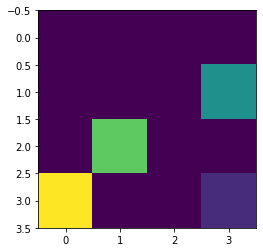

<IPython.core.display.Javascript object>

In [5]:
#to visualize the stochastic environment and run the random agent for 10 steps
env_Choice = 1
env = Environment(env_Choice)
agnt = RandomAgent(env)

obs, info,position = env.reset()
terminated= False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agnt.step(obs)
  reward, terminated, state = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

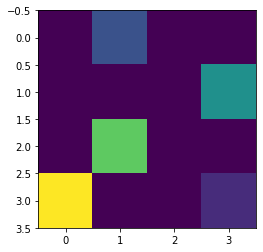

<IPython.core.display.Javascript object>

In [6]:
#to visualize the deterministic environment and run the random agent for 10 steps
env_Choice = 0
env = Environment(env_Choice)
agnt = RandomAgent(env)

obs, info, position = env.reset()
terminated= False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agnt.step(obs)
  reward, terminated, state = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

In [111]:
class Agent:
    def __init__(self, env, epsilon=1, alpha=0.1, gamma=0.99, number_of_episodes=1000, min_eps=0.01, mode_of_evaluation='q_learning'):
        self.n_states = env.observation_space.n
        self.n_actions = env.action_space.n
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.max_eps = epsilon
        self.alpha = alpha
        self.min_eps = min_eps
        self.qvalue_table = [[0 for i in range(4)] for j in range(16)]
        self.env = env
        self.number_of_episodes = number_of_episodes
        self.episode_reward = []
        self.epsilons = []
        self.mode_of_evaluation = mode_of_evaluation
     
     #save the pickle file   
    def save_qmap(self, path):
        with open(path, 'wb') as f:
            pickle.dump(self.qvalue_table, f)
    #load the pickle file        
    def load_qmap(self, path):
        with open(path, 'rb') as f:
            self.qvalue_table = pickle.load(f)
        
    def get_action(self, state, deterministic=False):
        if deterministic:
            return np.argmax(self.qvalue_table[state])
        best_actions = []
        max_q = max(self.qvalue_table[state])
        for idx, qval in enumerate(self.qvalue_table[state]):
            if qval == max_q:
                best_actions.append(idx)
        if random() <= self.epsilon:
            #random action
            return randint(0, self.n_actions-1)
        #choose one of the best actions
        return choice(best_actions)
            
    
    def update_qvalue_table(self, path_states, path_actions, path_rewards):
        for i in range(len(path_states[:-1])):
            state, action, reward, next_state = path_states[i], path_actions[i], path_rewards[i], path_states[i+1]
            if self.mode_of_evaluation == 'q_learning':
                target = reward + self.gamma*max(self.qvalue_table[next_state]) 
                prediction = self.qvalue_table[state][action]
                loss = target - prediction
                self.qvalue_table[state][action] += self.alpha * loss
                #self.qvalue_table[state][action] += self.alpha * (reward + self.gamma*max(self.qvalue_table[next_state]) - self.qvalue_table[state][action])
            elif self.mode_of_evaluation == 'sarsa':
                next_action = self.get_action(next_state)
                self.qvalue_table[state][action] += self.alpha * (reward + self.gamma*self.qvalue_table[next_state][next_action] - self.qvalue_table[state][action])
    
    def plot_data(self, plot_eps=False):
        plt.plot(self.episode_reward)
        plt.title('average episode return')
        plt.show()
        q_table = np.mean(self.qvalue_table, axis=-1).reshape((4, 4))
        print(tabulate(q_table, headers=[], tablefmt='grid'))
        plt.plot(self.epsilons)
        plt.title('epsilon at each iteration')
        plt.show()
    
    def deploy_algorithm(self):
        for i in tqdm(range(self.number_of_episodes)):
            self.epsilons.append(self.epsilon)
            
            self.epsilon *= (self.min_eps/self.epsilon)**(1/self.number_of_episodes)

            path_states = []
            path_actions = []
            path_rewards = []
            
            situation = False
            obs, situation, state = self.env.reset()
            
            while not situation:
                path_states.append(state)
                action = self.get_action(state)
                path_actions.append(action)
                reward, situation, state = self.env.step(action)
                path_rewards.append(reward)
                
                if situation:
                    path_states.append(state)

            episode_return = sum(path_rewards)
            self.episode_reward.append(episode_return)
            self.update_qvalue_table(path_states, path_actions, path_rewards)
            
        self.plot_data(plot_eps=True)


0
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected


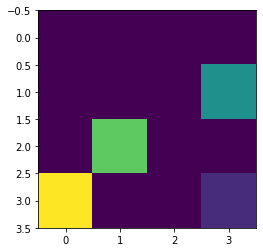

In [112]:
def mini_testing(env, agent):
    situation = False
    obs, info, state = env.reset()
    print(state)
    
    while not situation:
        
        agents_action = agent.get_action(state, deterministic=True)
        reward, situation, state = env.step(agents_action)
        #print(info)
        env.render()

env_Choice = 0
env = Environment(env_Choice)
agent = Agent(env)

mini_testing(env, agent)

 52%|█████▏    | 521/1000 [00:00<00:00, 2605.94it/s]

gold coin collected
gold coin collected
attacked by monster
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reac

100%|██████████| 1000/1000 [00:00<00:00, 2617.33it/s]


goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached

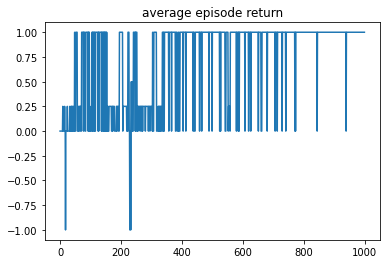

+-------------+------------+------------+-----------+
|  0          | 0.00215527 |  0.0223045 |  0.301941 |
+-------------+------------+------------+-----------+
|  0          | 0          |  0.465231  |  1.97799  |
+-------------+------------+------------+-----------+
| -0.00239902 | 0          |  2.17839   |  9.24985  |
+-------------+------------+------------+-----------+
|  0.00278437 | 0.411849   | 10.1529    | 36.3665   |
+-------------+------------+------------+-----------+


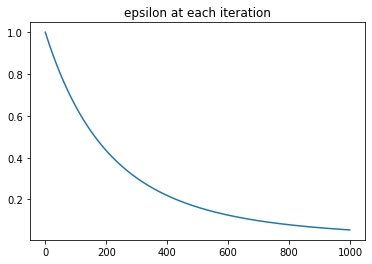

In [114]:
env_Choice = 0
env = Environment(env_Choice)

agent = Agent(
    env,
    number_of_episodes=1000,
    epsilon=1,
    min_eps=0.01,
    alpha=0.15,
    gamma=0.99,
    mode_of_evaluation='q_learning',
)
agent.deploy_algorithm()
agent.save_qmap('qlearning_deterministic.p')

 46%|████▌     | 462/1000 [00:00<00:00, 2197.55it/s]

diamond collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
attacked by monster
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
attacked by monster
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamon

 68%|██████▊   | 683/1000 [00:00<00:00, 1865.57it/s]

goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached

100%|██████████| 1000/1000 [00:00<00:00, 1870.60it/s]


goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached

+-----------+-------------+-------------+-----------+
| 0         |  0          |  0.00399635 |  0.344135 |
+-----------+-------------+-------------+-----------+
| 0.0052125 | -0.0375     |  0          |  1.61617  |
+-----------+-------------+-------------+-----------+
| 0.145694  |  0.00974885 |  2.66033    | 10.8062   |
+-----------+-------------+-------------+-----------+
| 0.227945  |  0.299011   | 10.0417     | 32.7491   |
+-----------+-------------+-------------+-----------+


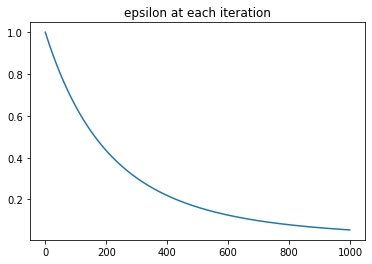

In [34]:
env_Choice = 1
env = Environment(env_Choice)

agent = Agent(
    env,
    number_of_episodes=1000,
    epsilon=1,
    min_eps=0.01,
    alpha=0.15,
    gamma=0.99,
    mode_of_evaluation='q_learning',
)
agent.deploy_algorithm()
agent.save_qmap('qlearning_stochastic.p')

 42%|████▏     | 417/1000 [00:00<00:00, 2112.17it/s]

diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
attacked by monster
diamond collected
diamond collected
attacked by monster
attacked by monster
attacked by monster
attacked by monster
attacked by monster
goal reached
goal reached
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
attacked by monster
attacked by monster
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
attacked by monster
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
attacked by monster
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collect

 92%|█████████▏| 923/1000 [00:00<00:00, 2310.58it/s]


diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond collected
diamond c

100%|██████████| 1000/1000 [00:00<00:00, 2281.48it/s]



goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached


+-------------+------------+-------------+-----------+
|  0          |  0         |  0.00139219 | 0.0436822 |
+-------------+------------+-------------+-----------+
| -0.00556875 | -0.120089  |  0.0700505  | 0.117666  |
+-------------+------------+-------------+-----------+
|  0.893417   |  0.0475197 | -0.0206831  | 1.81395   |
+-------------+------------+-------------+-----------+
|  4.31914    |  1.4267    |  1.99643    | 8.66136   |
+-------------+------------+-------------+-----------+


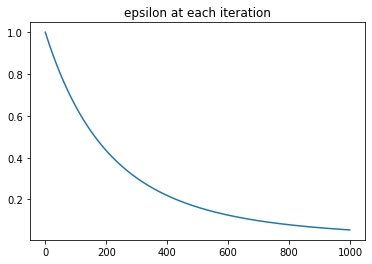

In [36]:
env_Choice = 0
env = Environment(env_Choice)

agent = Agent(
    env,
    number_of_episodes=1000,
    epsilon=1,
    min_eps=0.01,
    alpha=0.15,
    gamma=0.99,
    mode_of_evaluation='sarsa'

)
agent.deploy_algorithm()
agent.save_qmap('sarsa_deterministic.p')

 26%|██▌       | 257/1000 [00:00<00:00, 2501.16it/s]

attacked by monster
goal reached
goal reached
diamond collected
diamond collected
attacked by monster
attacked by monster
attacked by monster
diamond collected
goal reached
goal reached
goal reached
goal reached
attacked by monster
goal reached
diamond collected
diamond collected
diamond collected
gold coin collected
gold coin collected
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
attacked by monster
attacked by monster
attacked by monster
diamond collected
diamond collected
diamond collected
attacked by monster
attacked by monster
attacked by monster
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gol

 71%|███████▏  | 714/1000 [00:00<00:00, 1911.31it/s]


goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reache

100%|██████████| 1000/1000 [00:00<00:00, 1927.65it/s]



goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
goal reached
gold coin collected
gold coin collected
gold coin collected
gol

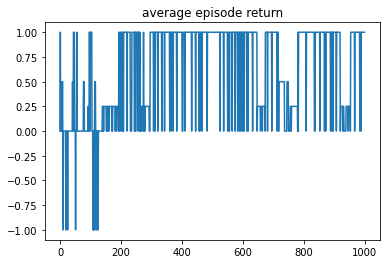

+------------+-------------+-----------+----------+
|  0         |  0.00279579 | 0.0509349 | 0.343658 |
+------------+-------------+-----------+----------+
| -0.0103022 | -0.0364125  | 0.348173  | 1.40133  |
+------------+-------------+-----------+----------+
| -0.0604629 |  0.0101202  | 0.63234   | 3.47679  |
+------------+-------------+-----------+----------+
|  0.367743  |  0.00663015 | 3.12293   | 8.87298  |
+------------+-------------+-----------+----------+


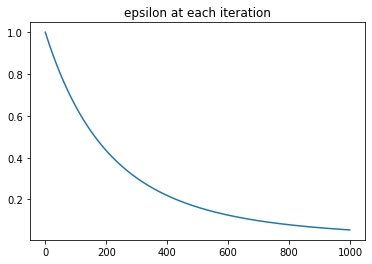

In [37]:
env_Choice = 1
env = Environment(env_Choice)

agent = Agent(
    env,
    number_of_episodes=1000,
    epsilon=1,
    min_eps=0.01,
    alpha=0.15,
    gamma=0.99,
    mode_of_evaluation='sarsa'
)
agent.deploy_algorithm()
agent.save_qmap('sarsa_stochastic.p')


In [13]:
def evaluate(env, agent, iterations=100):
    rewards = []
    for _ in range(iterations):
        done = False
        position, info, state = env.reset()
        total_reward = 0

        while not done:        
            agents_action = agent.get_action(state, deterministic=True)
            reward, done, state  = env.step(agents_action)
            total_reward += reward
            
        rewards.append(total_reward)
    return rewards



fig = plt.figure(figsize=(10,10))

# stochastic env
env_Choice = 1
env = Environment(env_Choice)
agent = Agent(env)
agent.load_qmap('qlearning_stochastic.p')
rewards = evaluate(env, agent)
ax = plt.subplot(2,1,1)
ax.set_title('agent performance on stochastic env')
plt.plot(rewards)

env = Environment(env_Choice)
agent = Agent(env)
agent.load_qmap('sarsa_stochastic.p')
rewards = evaluate(env, agent)
plt.plot(rewards)

ax.legend(['ql', 'sarsa'])


# deterministic env
env_Choice = 0
env = Environment(env_Choice)
agent = Agent(env)
agent.load_qmap('qlearning_deterministic.p')
rewards = evaluate(env, agent)
ax = plt.subplot(2,1,2)
ax.set_title('agent performance on deterministic env')
plt.plot(rewards)

env = Environment(env_Choice)
agent = Agent(env)
agent.load_qmap('sarsa_deterministic.p')
rewards = evaluate(env, agent)
plt.plot(rewards)

ax.legend(['ql', 'sarsa'])

plt.show()

gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected
gold coin collected


In [14]:
# Imports
import gymnasium
from gymnasium import spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint, random, choice
import time
from tqdm import tqdm

from google.colab import drive



In [15]:
# Defining the Stock Trading Environment.
"""DON'T MAKE ANY CHANGES TO THE ENVIRONMENT."""


class StockTradingEnvironment(gymnasium.Env):
    """This class implements the Stock Trading environment."""

    def __init__(self, file_path, train=True, number_of_days_to_consider=10):
        """This method initializes the environment.

        :param file_path: - Path of the CSV file containing the historical stock data.
        :param train: - Boolean indicating whether the goal is to train or test the performance of the agent.
        :param number_of_days_to_consider = Integer representing the number of days the for which the agent
                considers the trend in stock price to make a decision."""

        self.file_path = file_path
        #drive.mount(file_path)
        self.stock_data = pd.read_csv(self.file_path)
        self.train = train

        # Splitting the data into train and test datasets.
        self.training_stock_data = self.stock_data.iloc[:int(0.8 * len(self.stock_data))]
        self.testing_stock_data = self.stock_data.iloc[int(0.8 * len(self.stock_data)):].reset_index()

        self.observation_space = spaces.Discrete(4)
        self.action_space = spaces.Discrete(3)

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # This defines the number of days for which the agent considers the data before taking an action.
        self.number_of_days_to_consider = number_of_days_to_consider
        # The maximum timesteps the agent will take before the episode ends.
        if self.train:
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider
        else:
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider
        # Initializing the number of steps taken to 0.
        self.timestep = 0
        self.reset()

    def reset(self):
        """This method resets the environment and episode_reward the observation.

        :episode_reward observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.

                 info: - info: - A dictionary that can be used to provide additional implementation information."""

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # Initializing the number of steps taken to 0.
        self.timestep = 0

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector that will be passed to the agent.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector.
            observation = [price_increase, stock_held]

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        info = None

        return observation, info

    def step(self, action):
        """This method implements what happens when the agent takes the action to Buy/Sell/Hold.

        :param action: - Integer in the range 0 to 2 inclusive.

        :episode_reward observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.
                 reward: - Integer/Float value that's used to measure the performance of the agent.
                 terminated: - Boolean describing whether the episode has terminated.
                 truncated: - Boolean describing whether a truncation condition outside the scope of the MDP is satisfied.
                 info: - A dictionary that can be used to provide additional implementation information."""

        # We give the agent a penalty for taking actions such as buying a stock when the agent doesn't have the
        # investment capital and selling a stock when the agent doesn't have any shares.
        penalty = 0

        if self.train:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.training_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value +=\
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider]\
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        else:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.testing_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = self.training_stock_data['Open'][
                                           self.timestep + self.number_of_days_to_consider] * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        # Determining if the agent currently has shares of the stock or not.
        if self.number_of_shares > 0:
            stock_held = True
        else:
            stock_held = False

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        self.timestep += 1  # Increasing the number of steps taken by the agent by 1.

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        # Computing the total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # Appending the total account value of the list to plot the graph.
        self.total_account_value_list.append(self.total_account_value)

        # The episode terminates when the maximum timesteps have been reached.
        terminated = True if (self.timestep >= self.max_timesteps) \
            else False
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """This method renders the agent's total account value over time.

        :param mode: 'human' renders to the current dismini_testing or terminal and episode_reward nothing."""

        plt.figure(figsize=(15, 10))
        plt.plot(self.total_account_value_list, color='lightseagreen', linewidth=7)
        plt.xlabel('Days', fontsize=32)
        plt.ylabel('Total Account Value', fontsize=32)
        plt.title('Total Account Value over Time', fontsize=38)
        plt.grid()
        plt.show()

In [16]:
%ls

drive/                     qlearning_stochastic.p  sarsa_deterministic.p
qlearning_deterministic.p  sample_data/            sarsa_stochastic.p


In [17]:
stock_trading_environment = StockTradingEnvironment('/content/sample_data/NVDA.csv', number_of_days_to_consider=10)

  0%|          | 0/1000 [00:00<?, ?it/s]

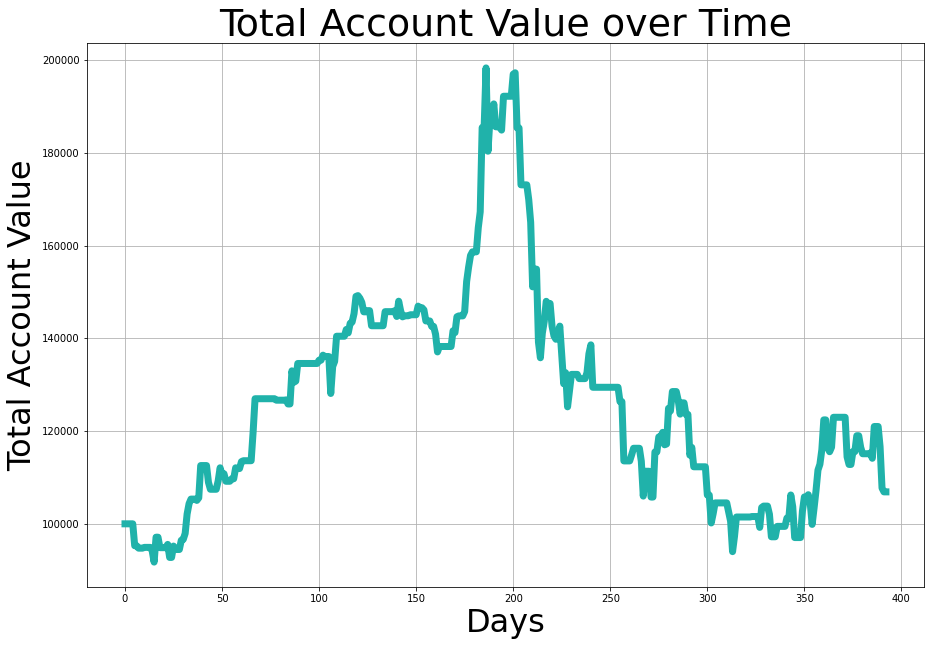

  0%|          | 1/1000 [00:00<07:29,  2.22it/s]

  0%|          | 2/1000 [00:00<07:31,  2.21it/s]

  0%|          | 3/1000 [00:01<07:33,  2.20it/s]

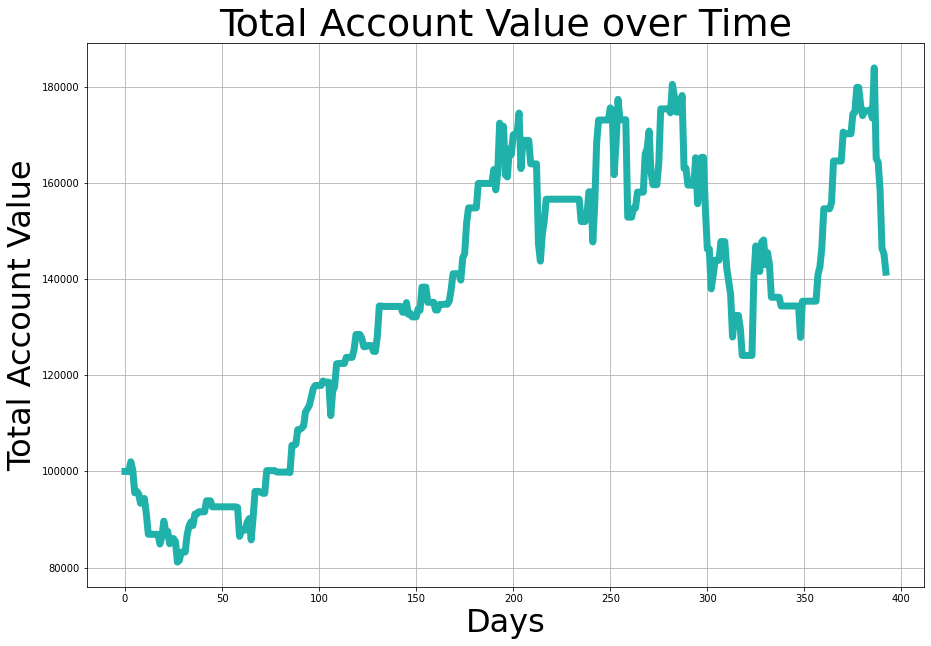

  0%|          | 4/1000 [00:01<08:43,  1.90it/s]

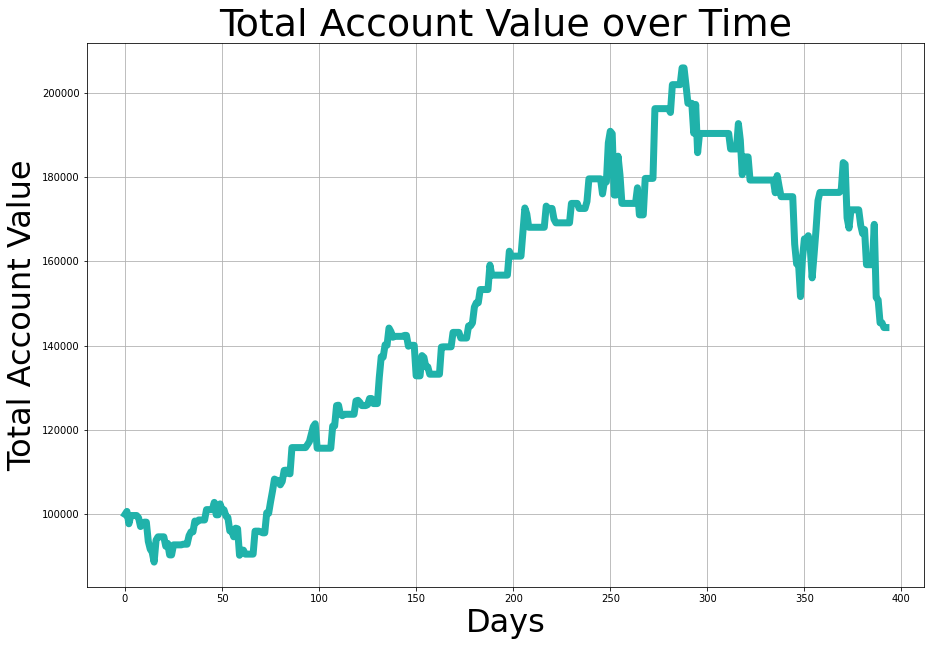

  0%|          | 5/1000 [00:02<08:22,  1.98it/s]

  1%|          | 6/1000 [00:02<07:58,  2.08it/s]

  1%|          | 7/1000 [00:03<07:47,  2.12it/s]

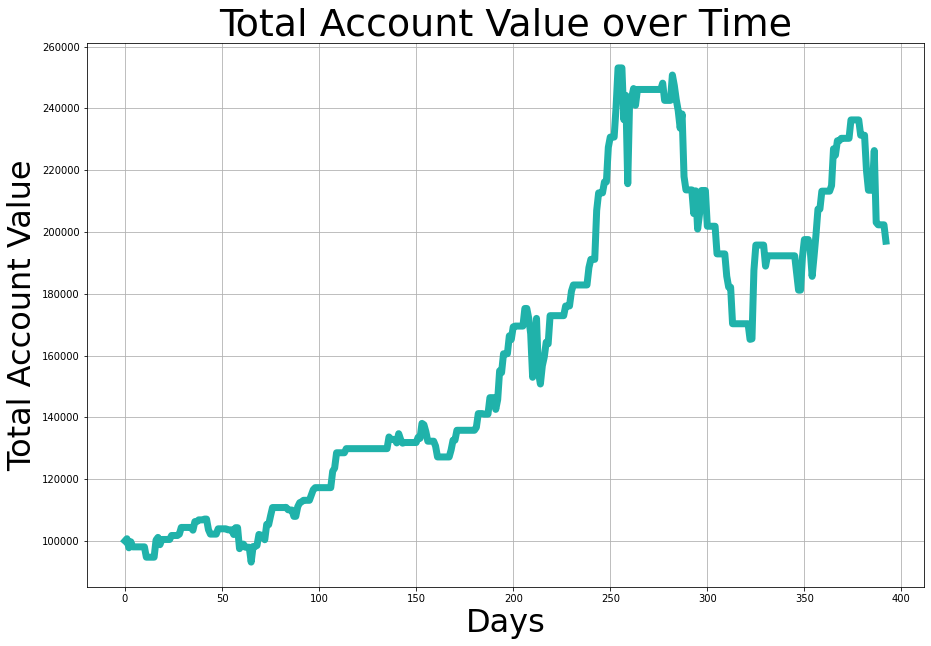

  1%|          | 8/1000 [00:03<07:48,  2.12it/s]

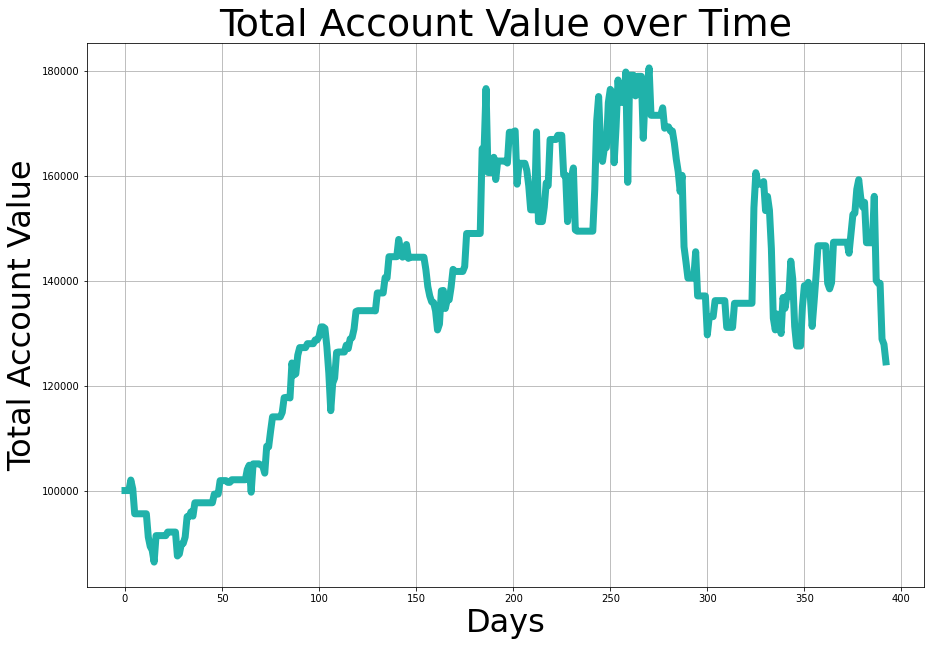

  1%|          | 9/1000 [00:04<09:07,  1.81it/s]

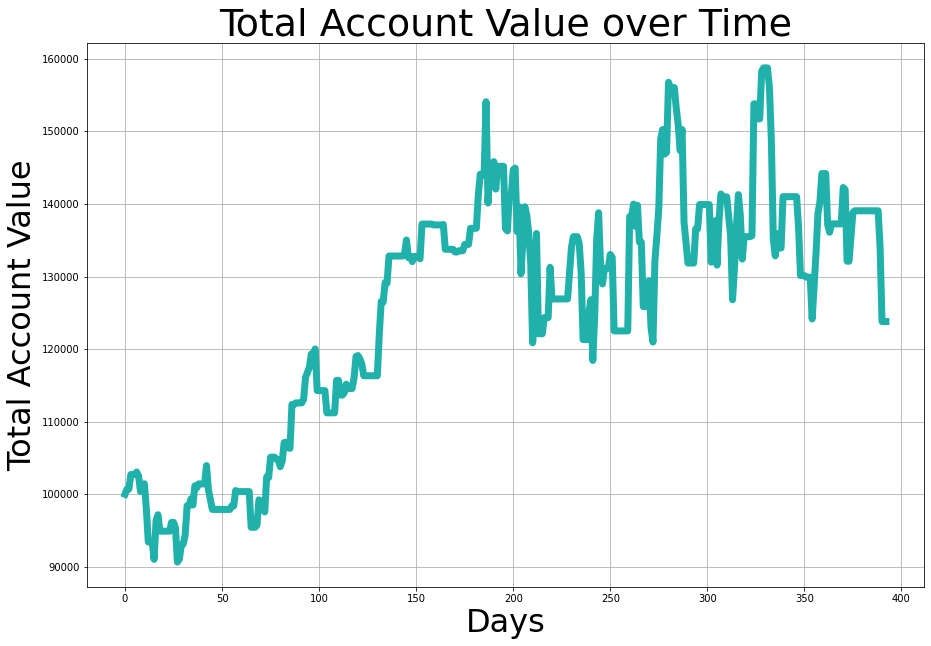

  1%|          | 10/1000 [00:05<09:53,  1.67it/s]

  1%|          | 11/1000 [00:05<10:35,  1.56it/s]

  1%|          | 12/1000 [00:07<10:12,  1.61it/s]


KeyboardInterrupt: ignored

In [104]:
class Agent:
    def __init__(self, env, epsilon=1, alpha=0.2, gamma=0.99, number_of_episodes=1000, min_eps=0.01, mode_of_evaluation='q_learning'):
        self.n_states = env.observation_space.n
        self.n_actions = env.action_space.n
        
        self.gamma = gamma
        self.epsilon = epsilon
        self.max_eps = epsilon
        self.alpha = alpha
        self.min_eps = min_eps
        self.qvalue_table = [[0 for i in range(self.n_actions)] for j in range(self.n_states)]
        self.env = env
        self.number_of_episodes = number_of_episodes
        self.episode_reward = []
        self.epsilons = []
        self.mode_of_evaluation = mode_of_evaluation
        
        
    def get_action(self, state, deterministic=False):
        if deterministic:
            return np.argmax(self.qvalue_table[state])
        best_actions = []
        max_q = max(self.qvalue_table[state])
        for idx, qval in enumerate(self.qvalue_table[state]):
            if qval == max_q:
                best_actions.append(idx)
        if random() <= self.epsilon:
            #random action
            return randint(0, self.n_actions-1)
        #choose one of the best actions
        return choice(best_actions)
            
    
    def update_qvalue_table(self, path_states, path_actions, path_rewards):
        for i in range(len(path_states[:-1])):
            state, action, reward, next_state = path_states[i], path_actions[i], path_rewards[i], path_states[i+1]
            if self.mode_of_evaluation == 'q_learning':
                self.qvalue_table[state][action] += self.alpha * (reward + self.gamma*max(self.qvalue_table[next_state]) - self.qvalue_table[state][action])
            
    def plot_metadata(self, plot_eps=False):
        plt.plot(self.episode_reward)
        plt.title('average episode return')
        plt.show()
        plt.plot(self.epsilons)
        plt.title('epsilon at each iteration')
        plt.show()
    
    def deploy_algorithm(self):
        for i in tqdm(range(self.number_of_episodes)):
            self.epsilons.append(self.epsilon)
            
            self.epsilon *= (self.min_eps/self.epsilon)**(1/self.number_of_episodes)
            
            path_states = []
            path_actions = []
            path_rewards = []

            state, info = self.env.reset()
            action = self.get_action(state)
            observation, reward, terminated, truncated, info = self.env.step(action)
            
            while terminated != True:
                path_states.append(state)
                action = self.get_action(state)
                path_actions.append(action)
                observation, reward, terminated, truncated, info = self.env.step(action)
                path_rewards.append(reward)
                #env.render()
                
            if terminated == True:
                path_states.append(observation)
            episode_return = sum(path_rewards)
            self.episode_reward.append(episode_return)
            self.update_qvalue_table(path_states, path_actions, path_rewards)
            env.render()
            
        self.plot_metadata(plot_eps=True)
        
        
  
env_Choice = 0
path = "/content/sample_data/NVDA.csv"
number_of_days = 10
env = StockTradingEnvironment(path,number_of_days_to_consider = number_of_days)
agent = Agent(env)
agent.deploy_algorithm()


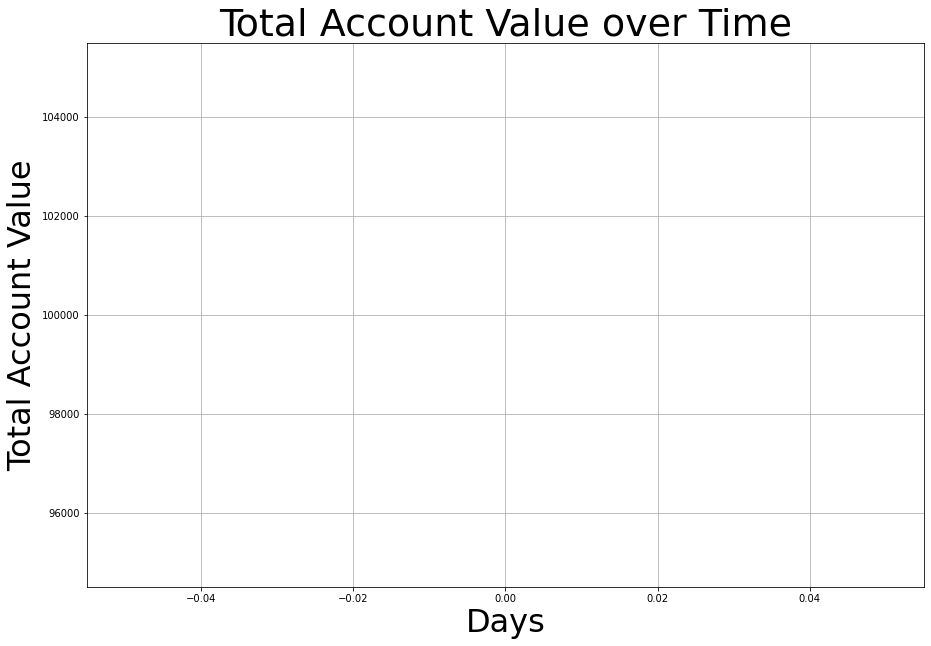

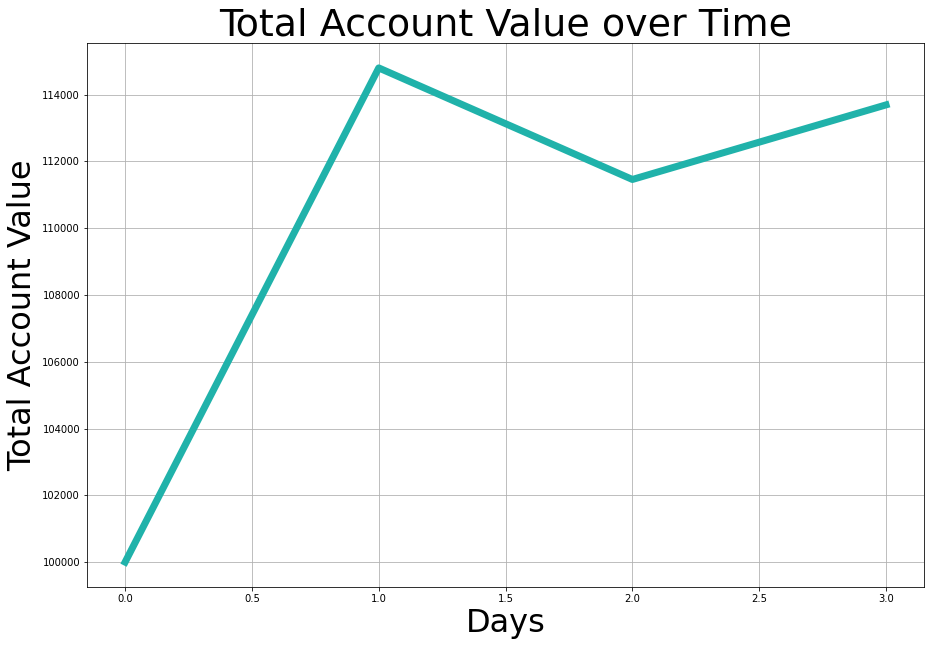

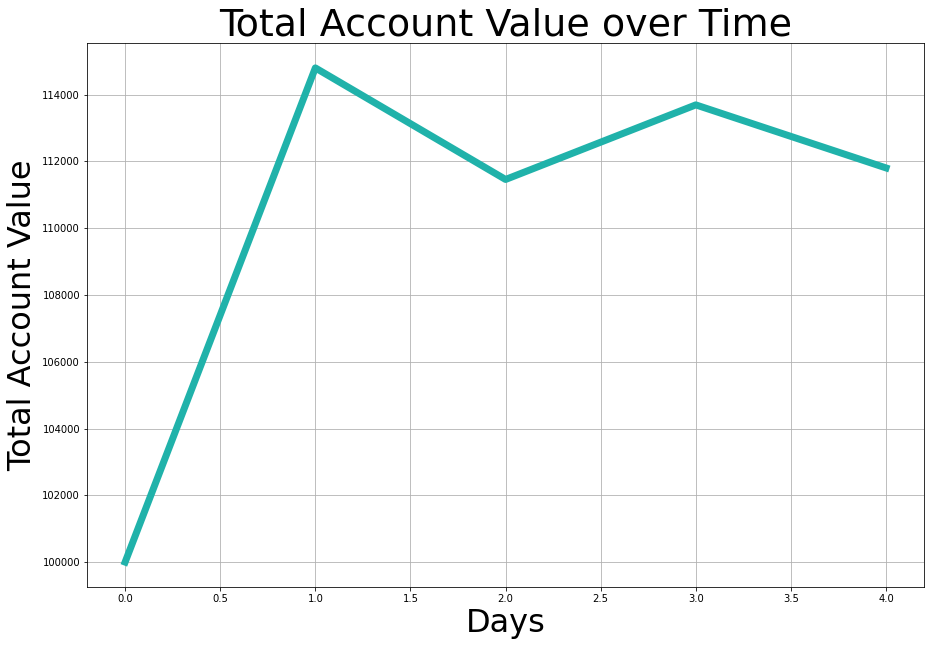

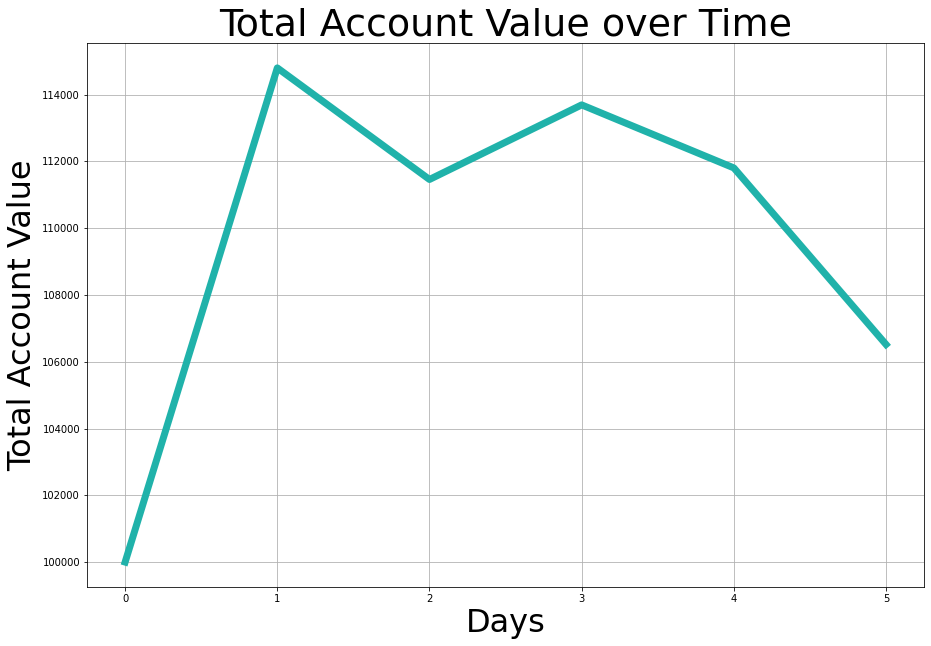

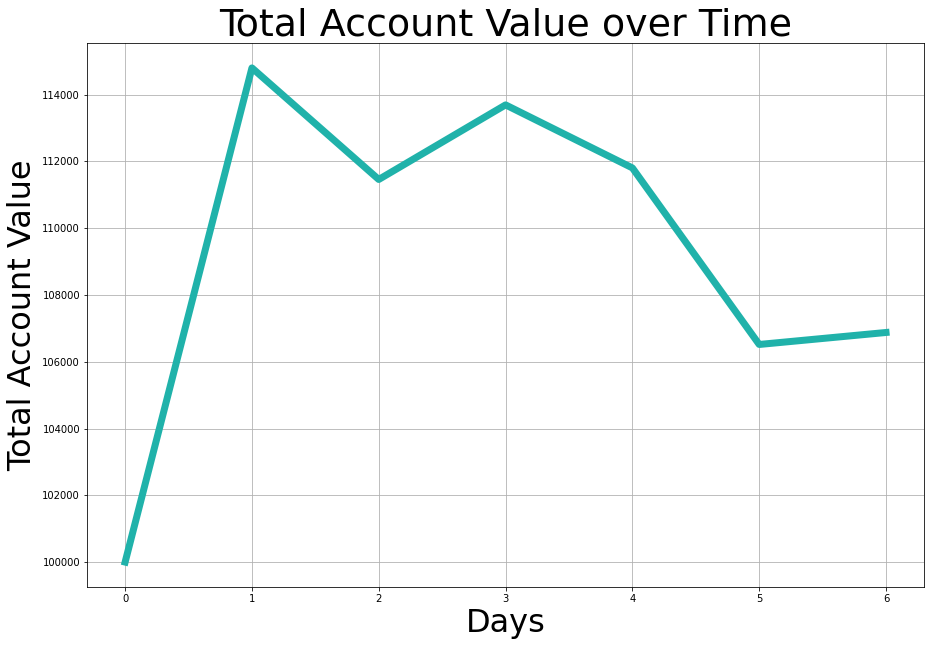

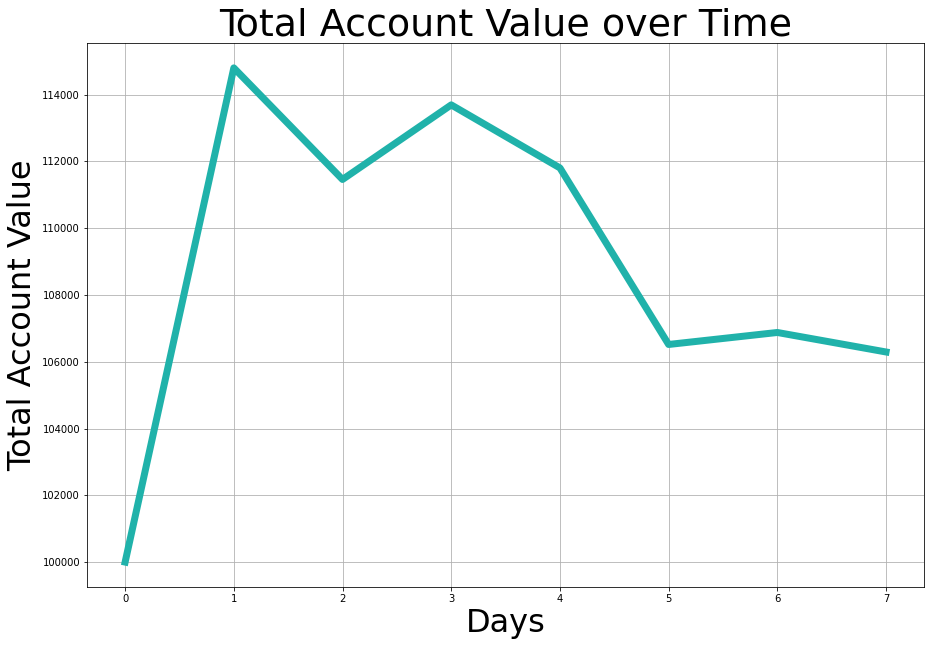

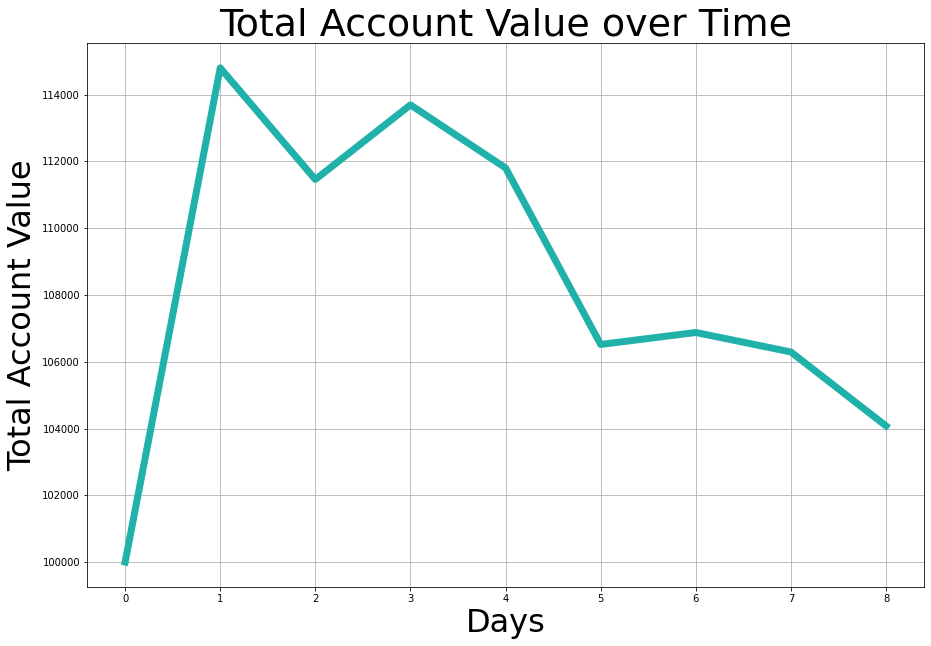

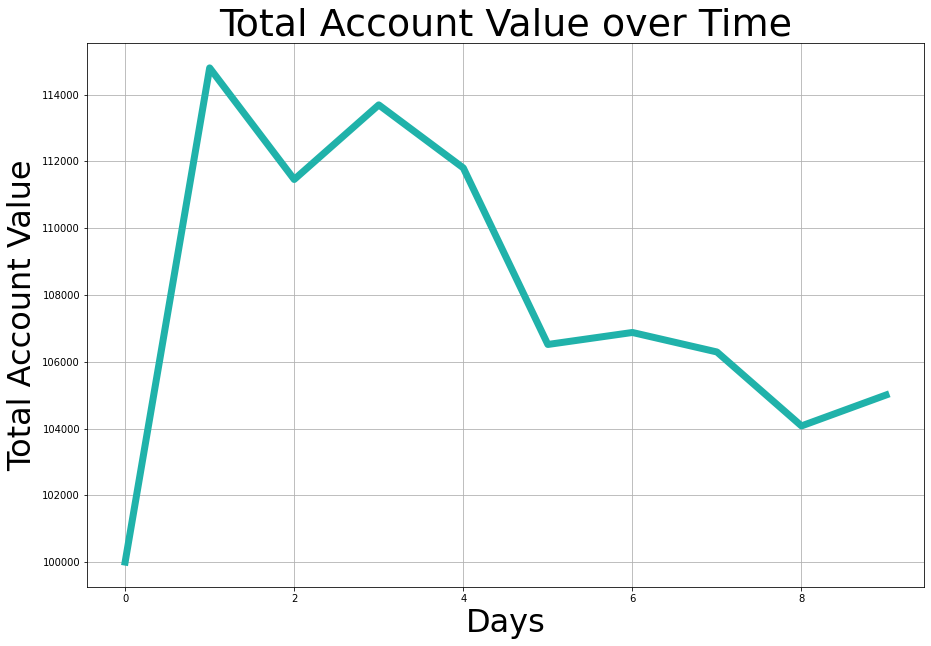

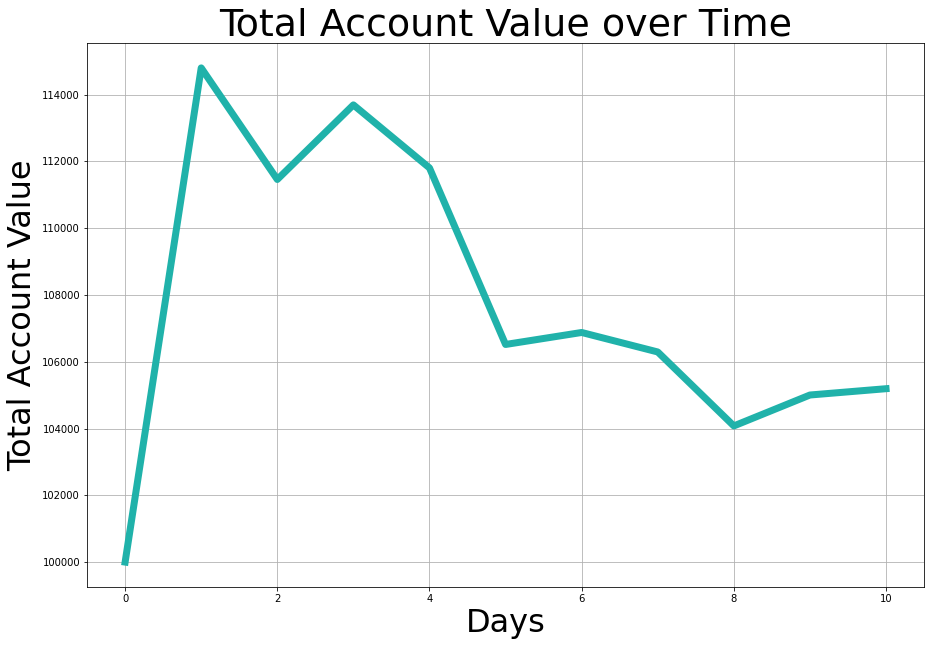

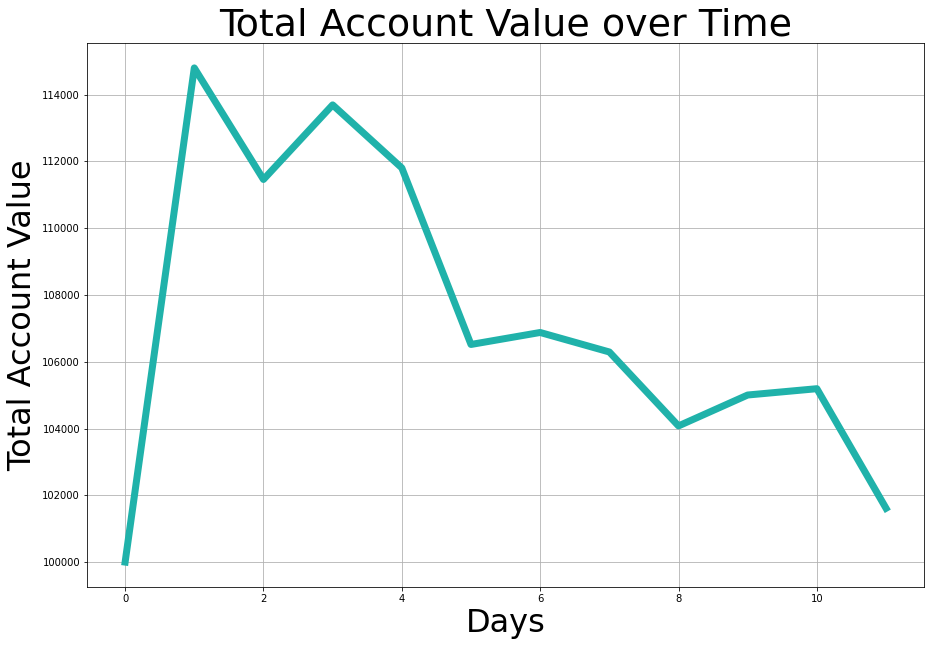

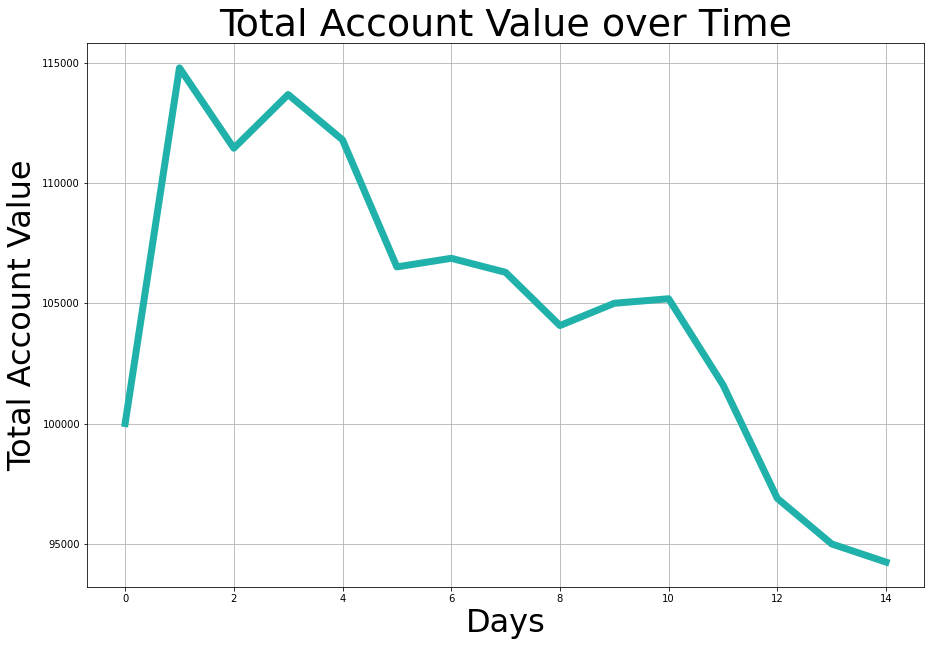

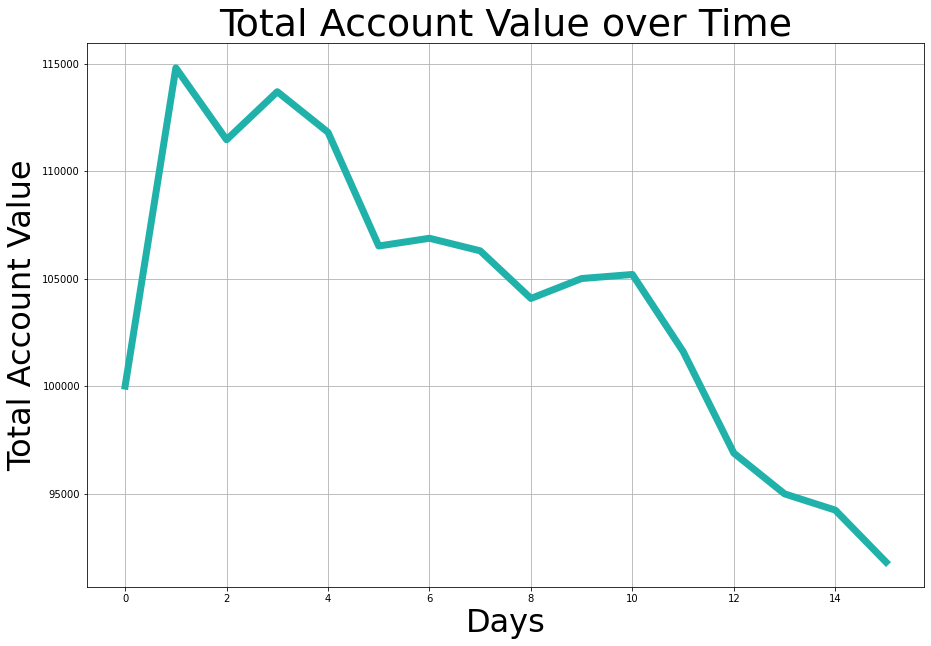

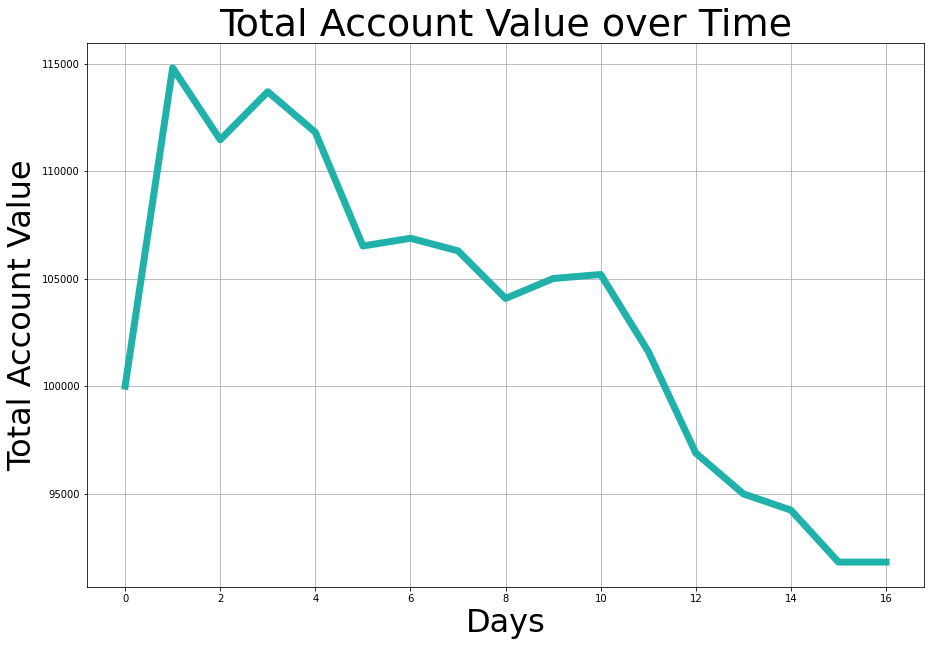

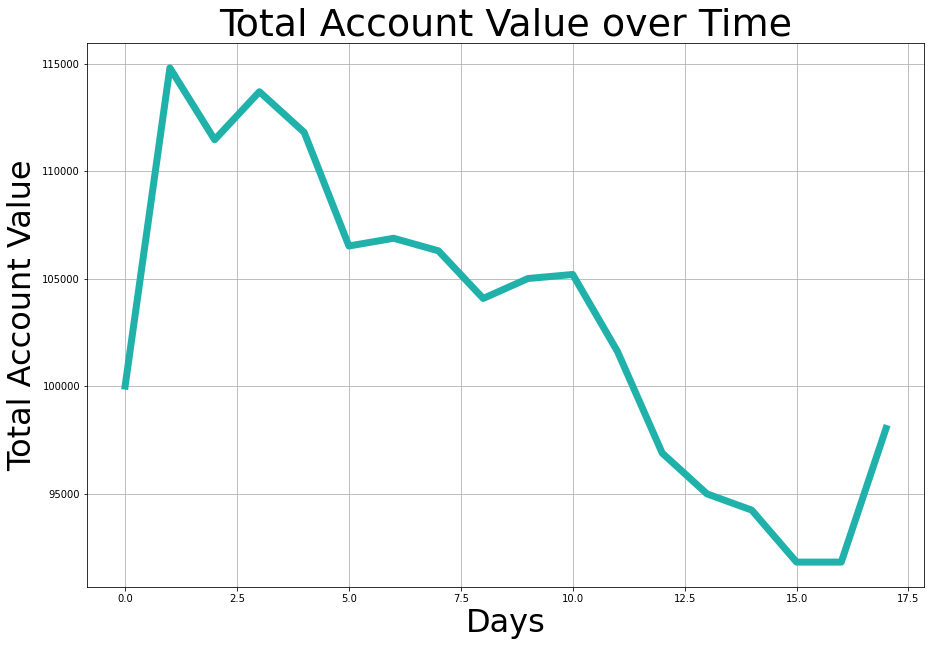

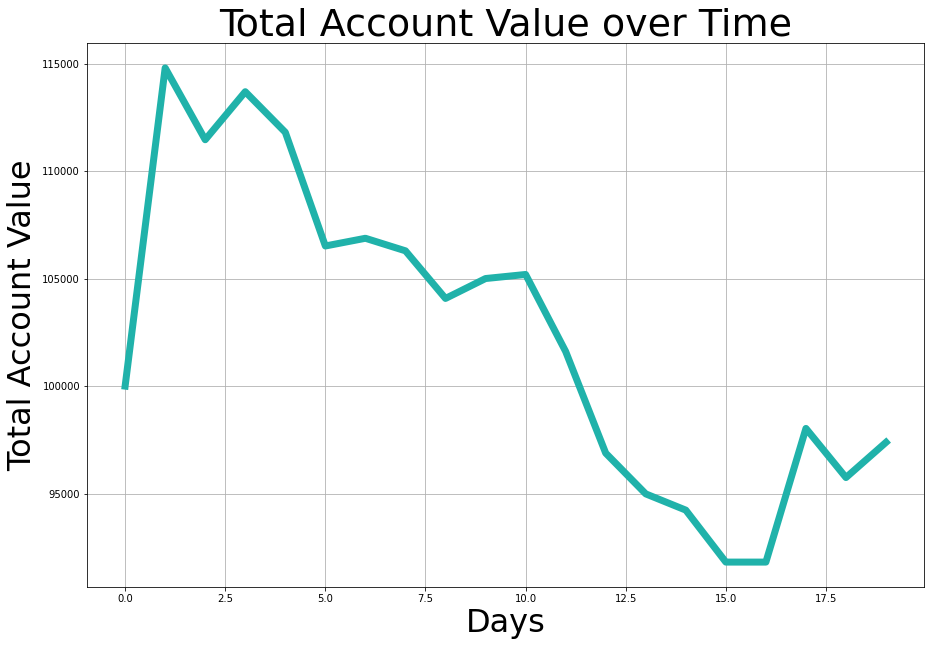

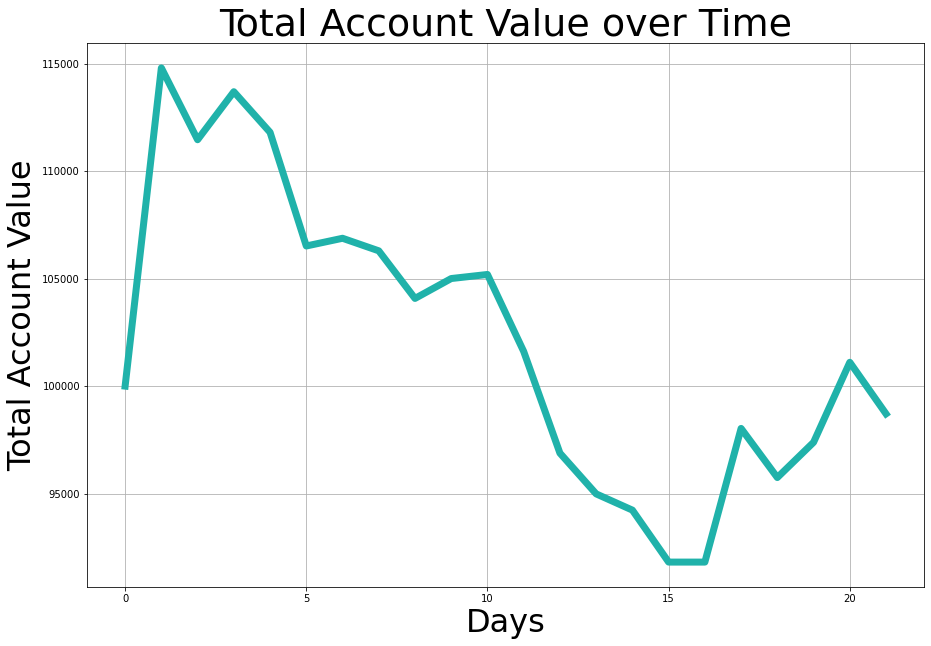

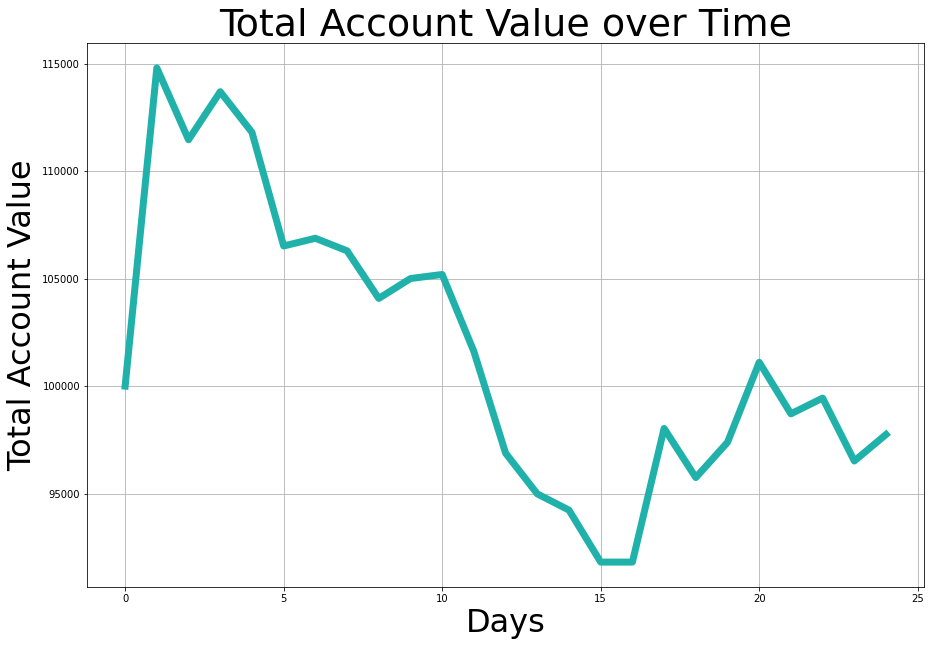

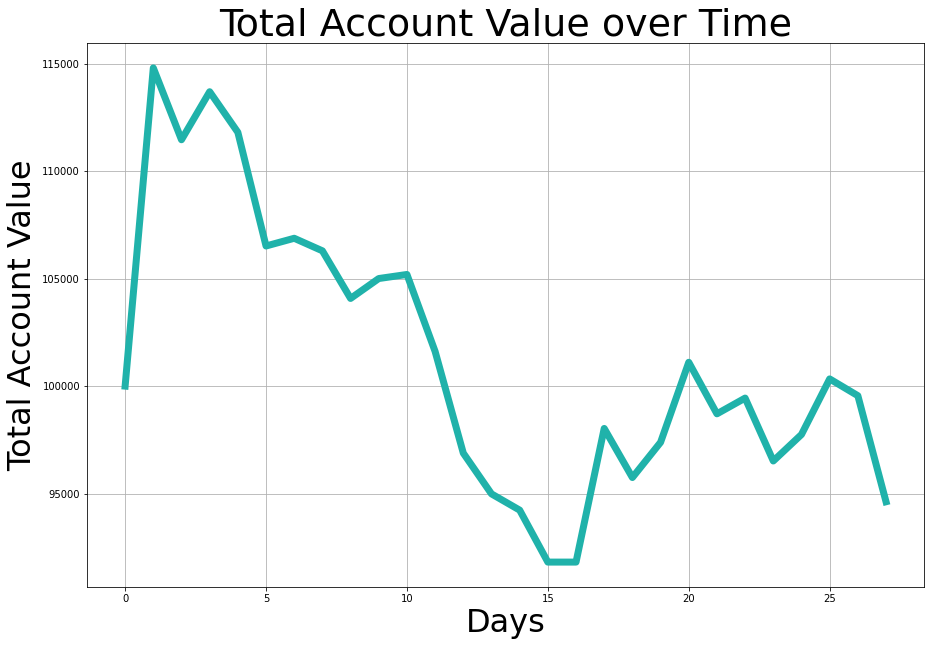

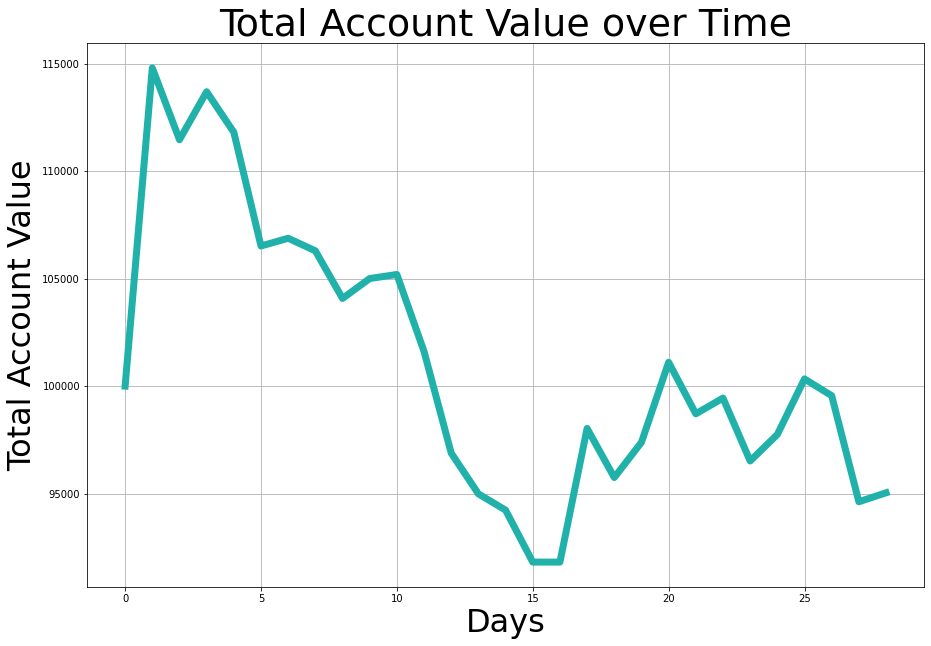

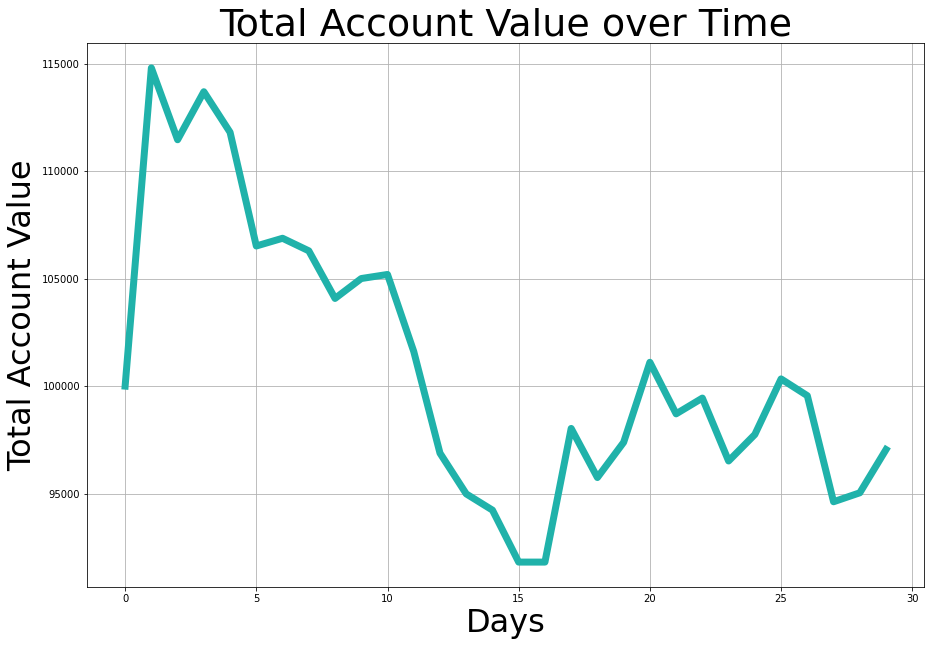

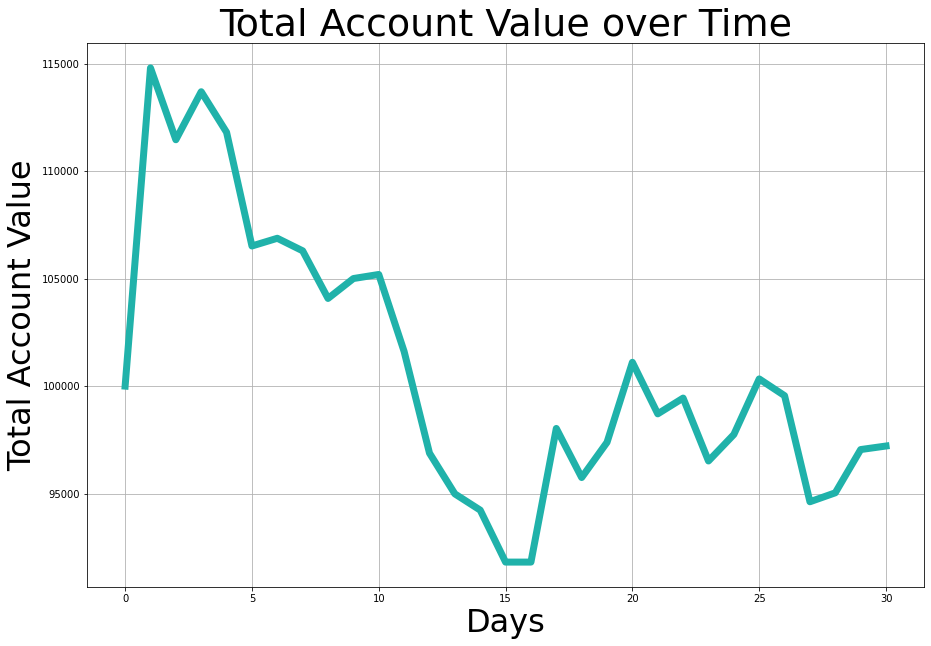

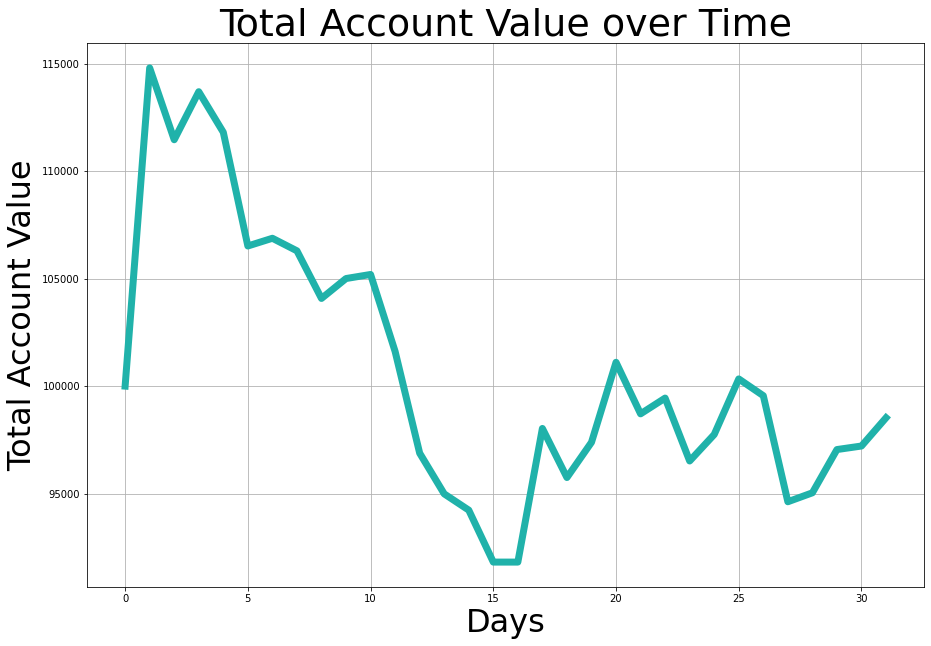

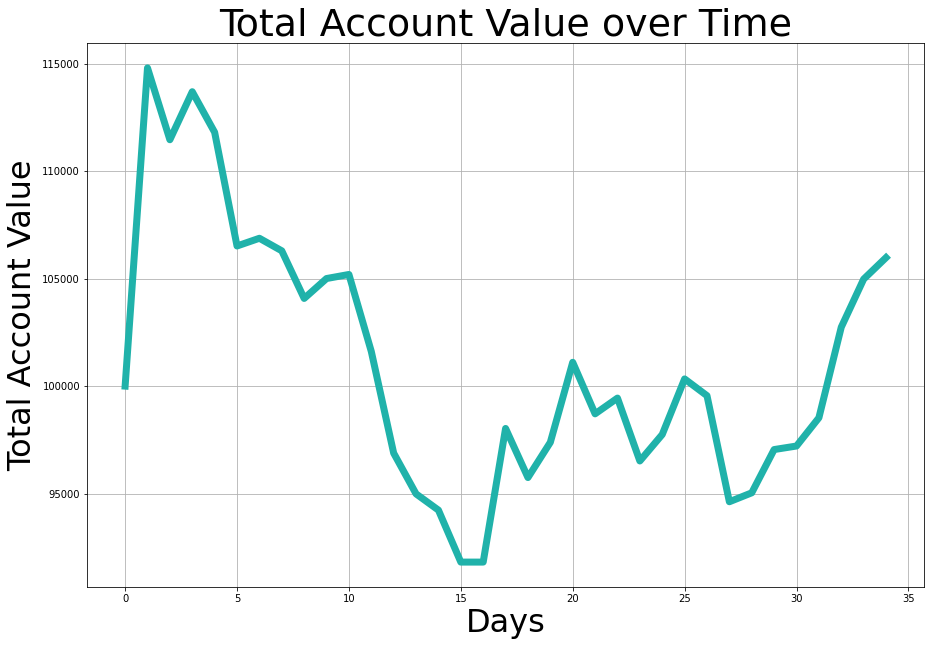

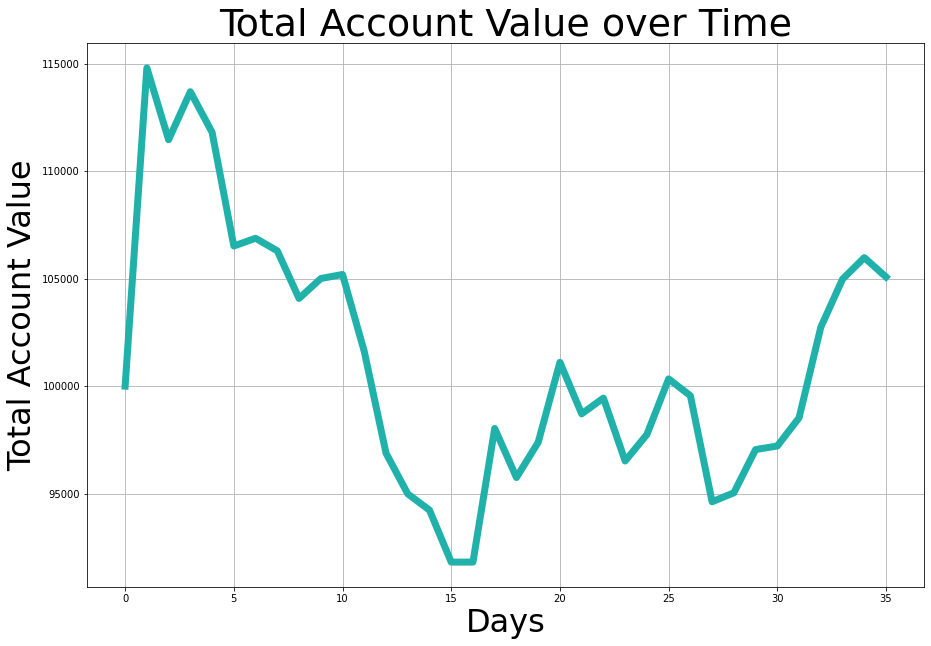

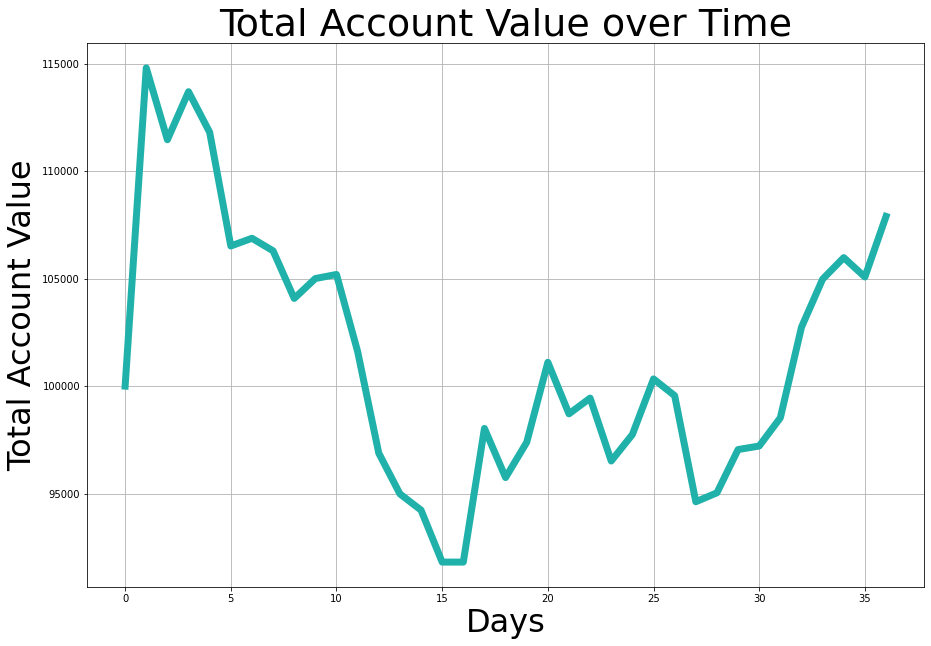

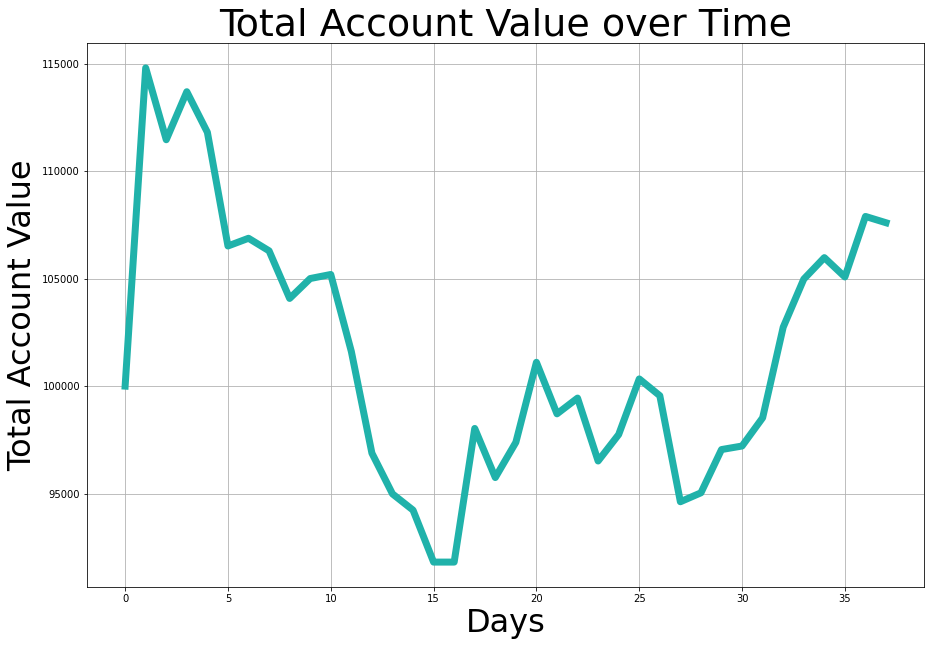

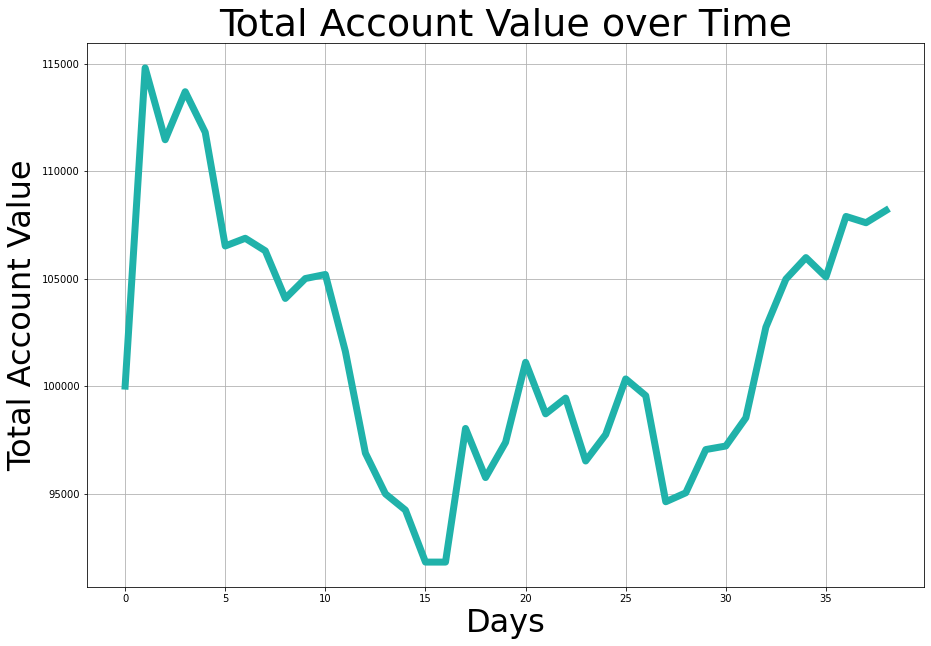

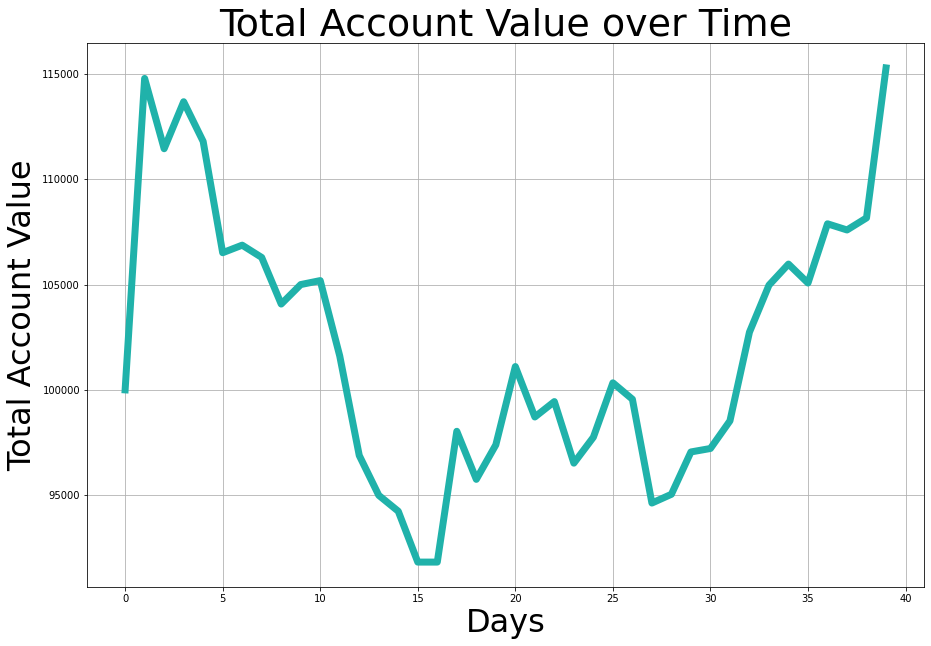

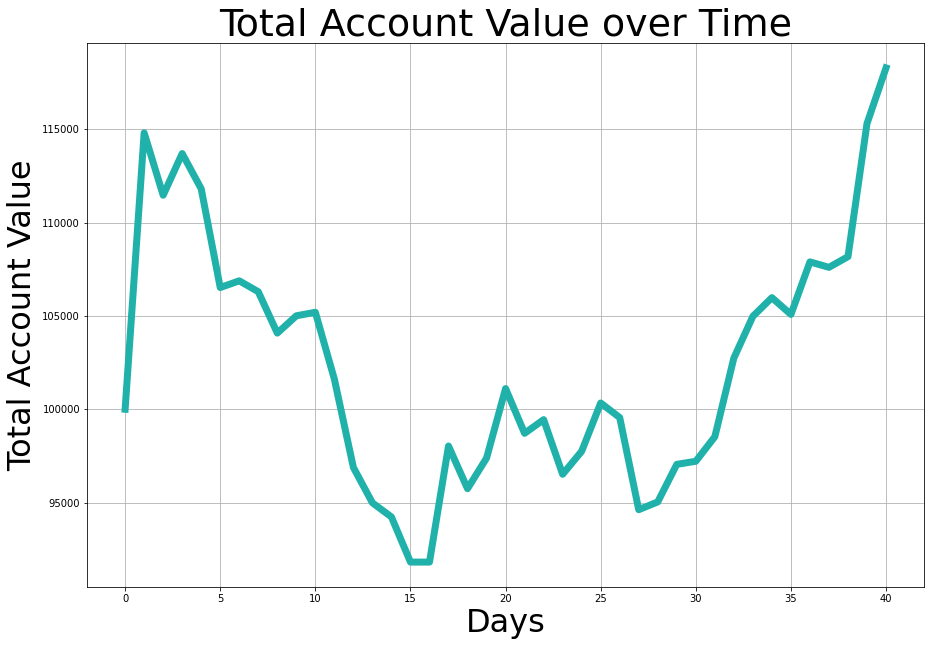

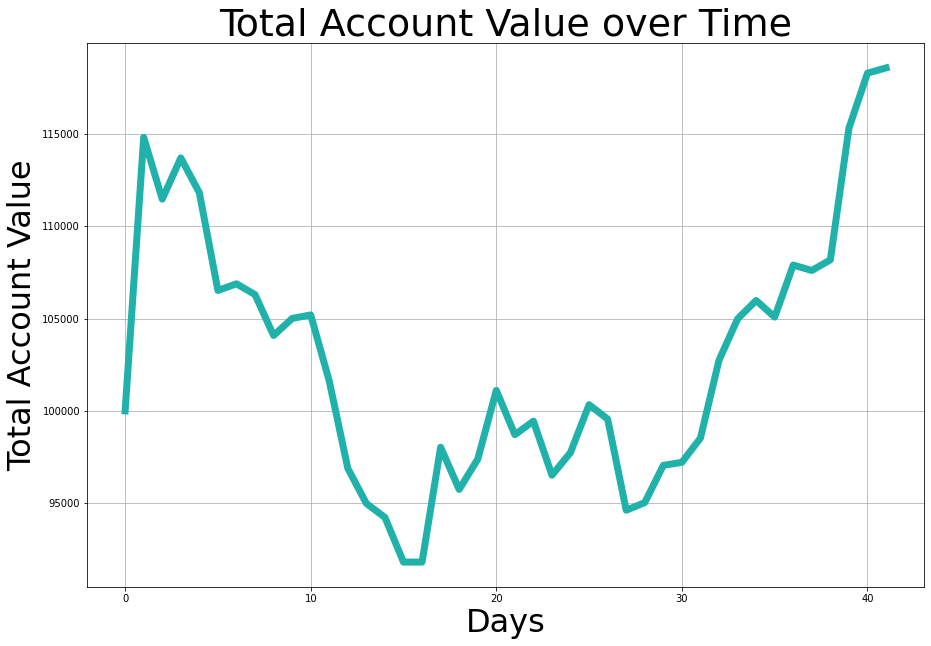

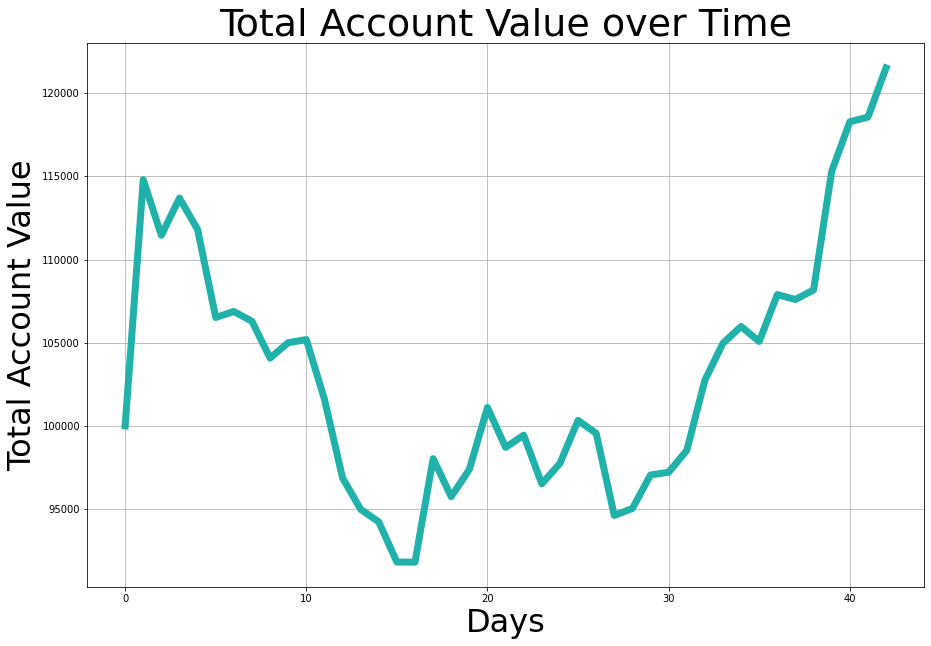

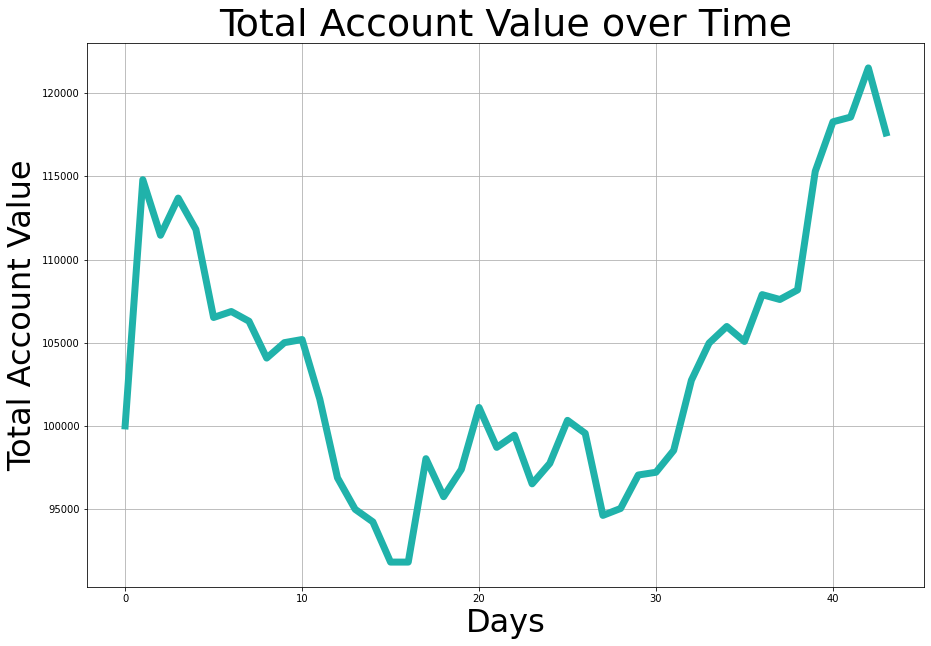

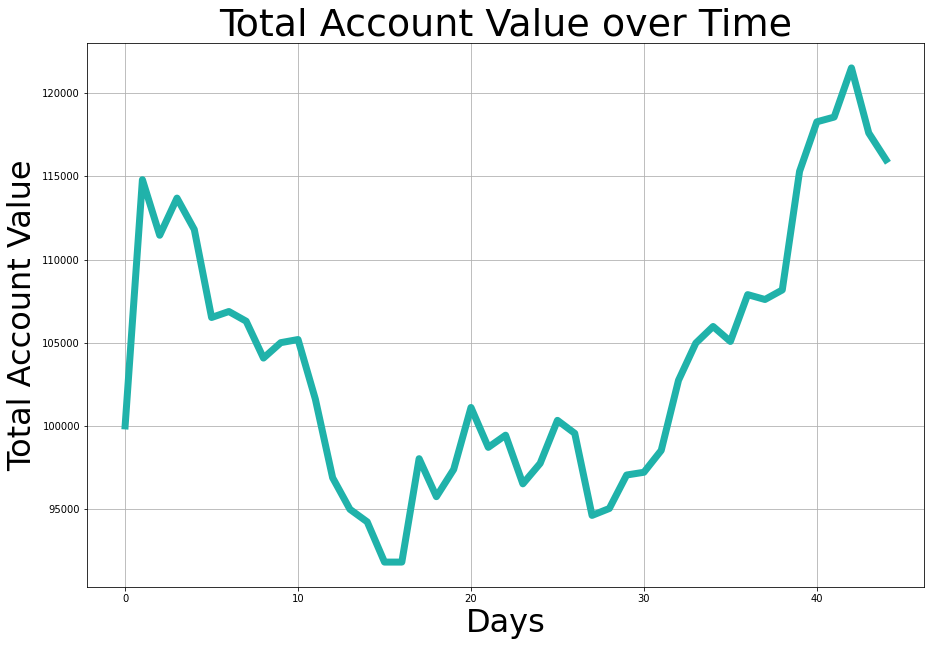

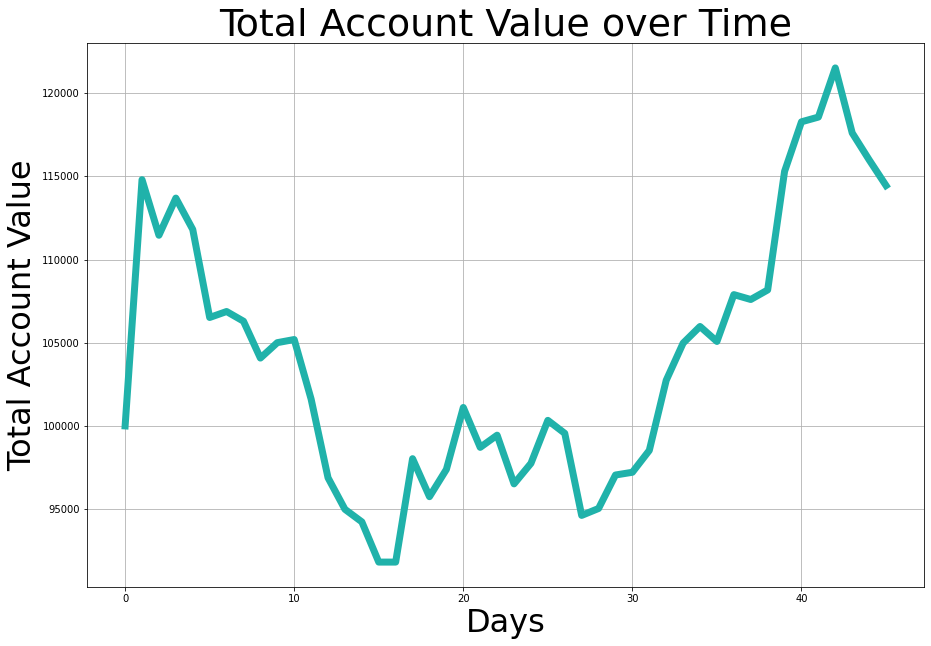

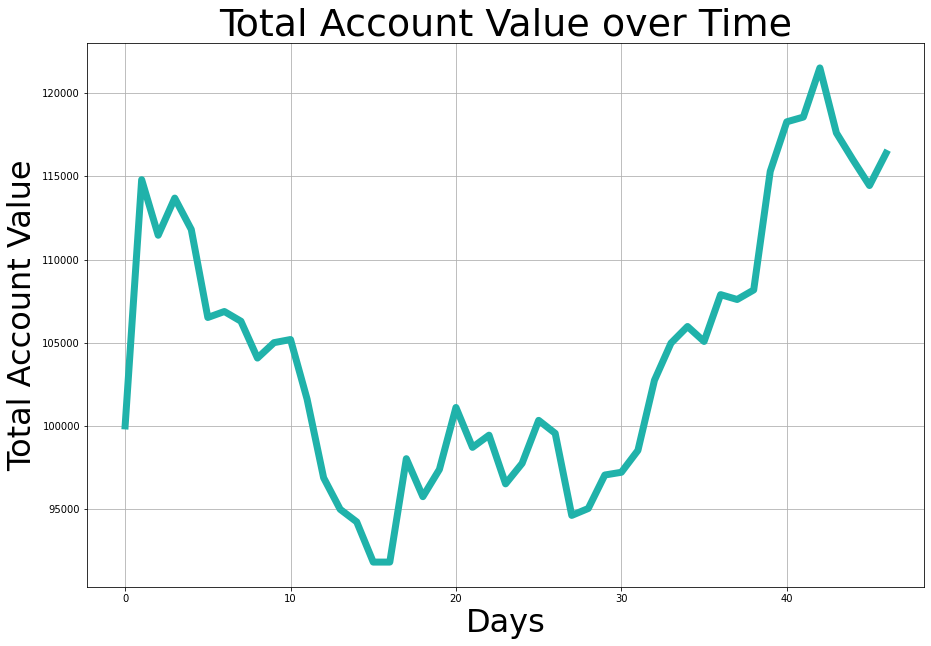

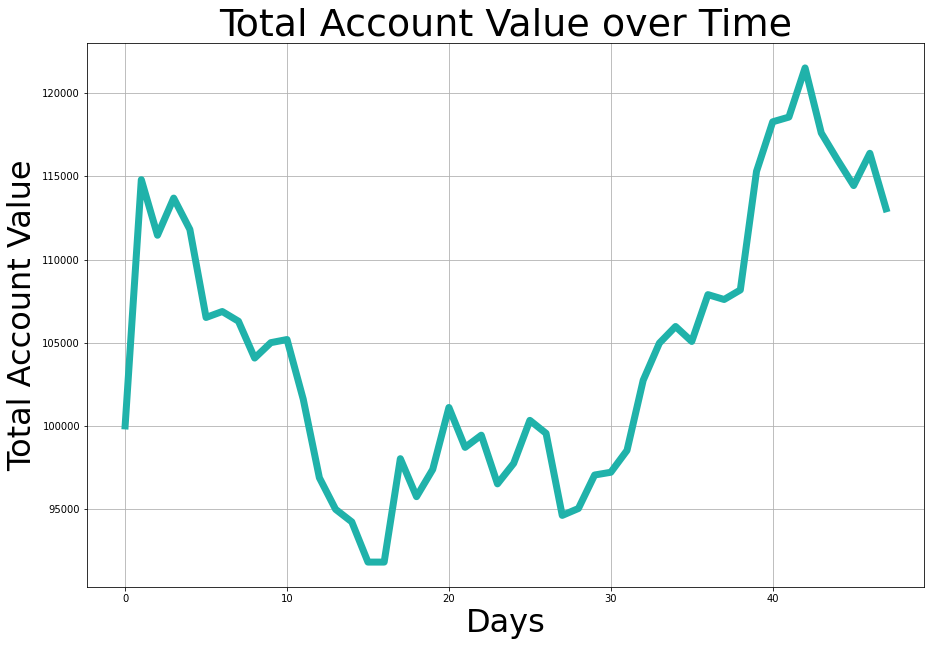

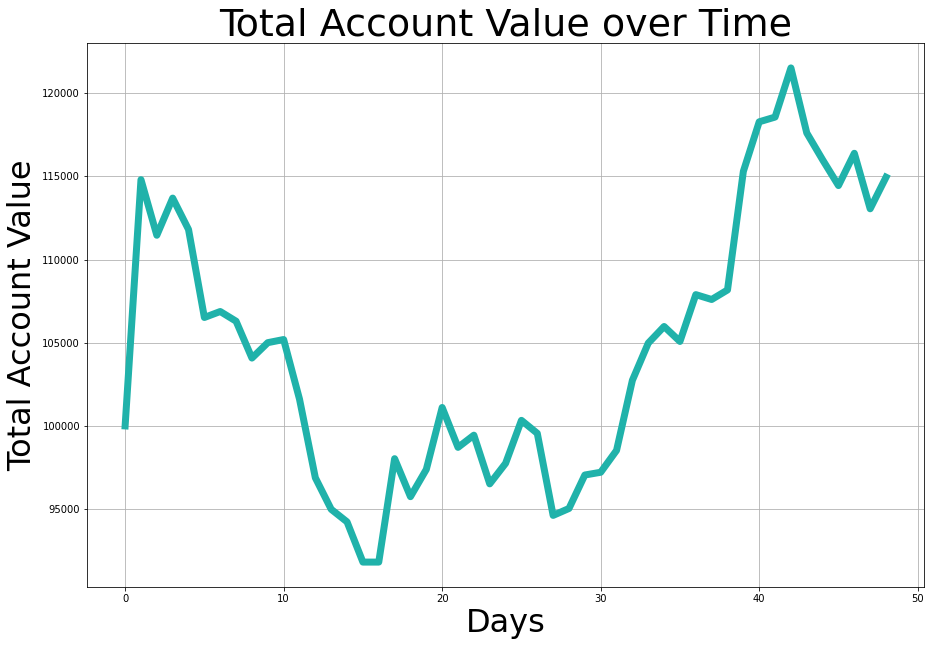

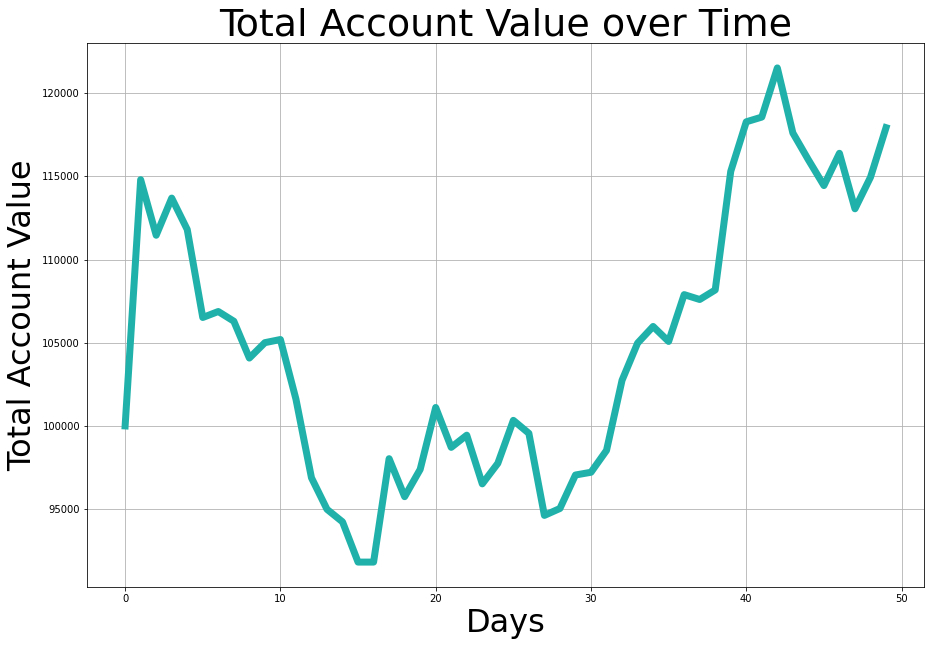

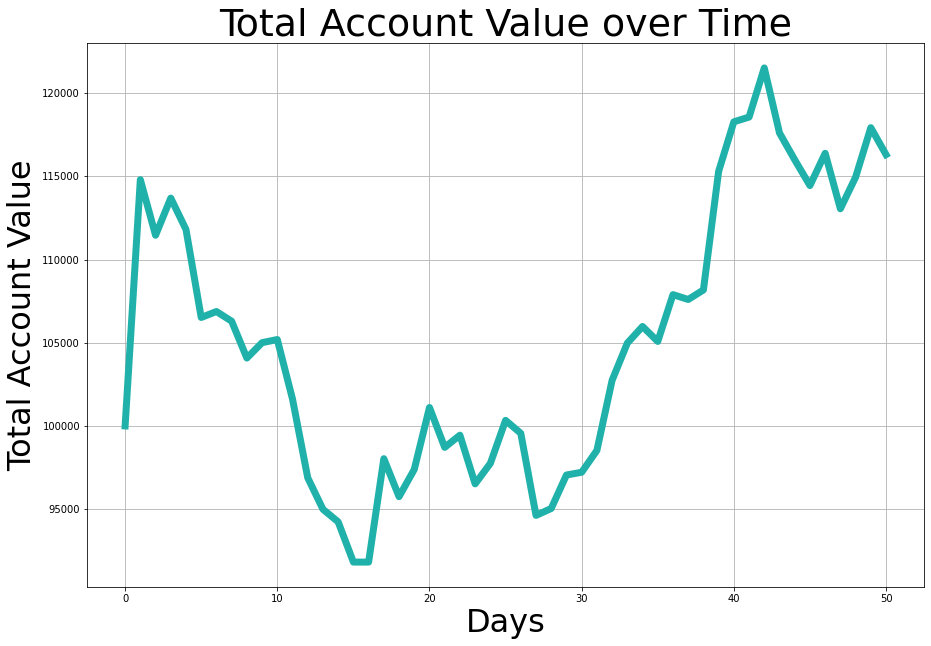

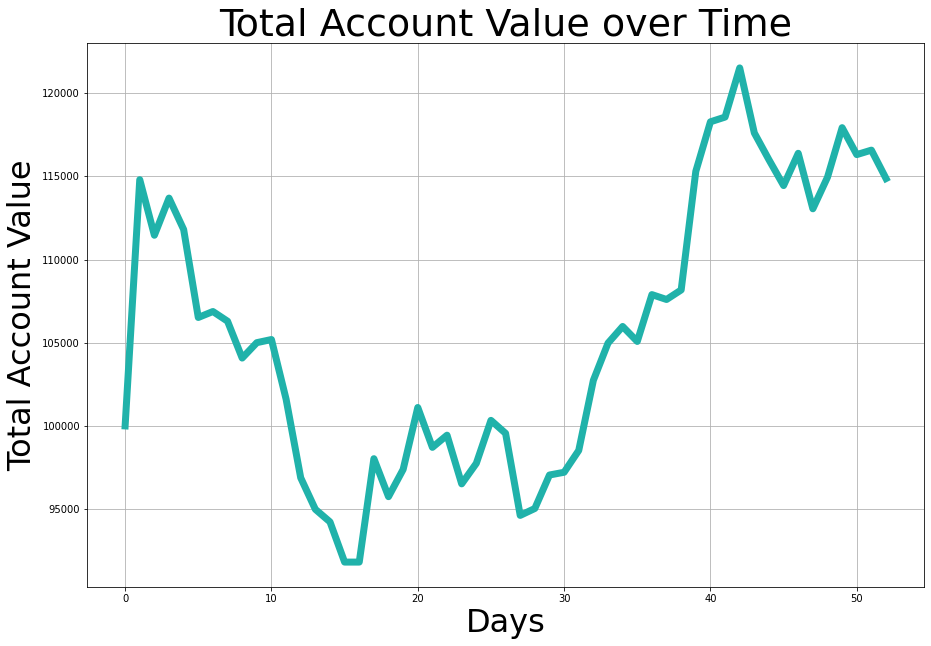

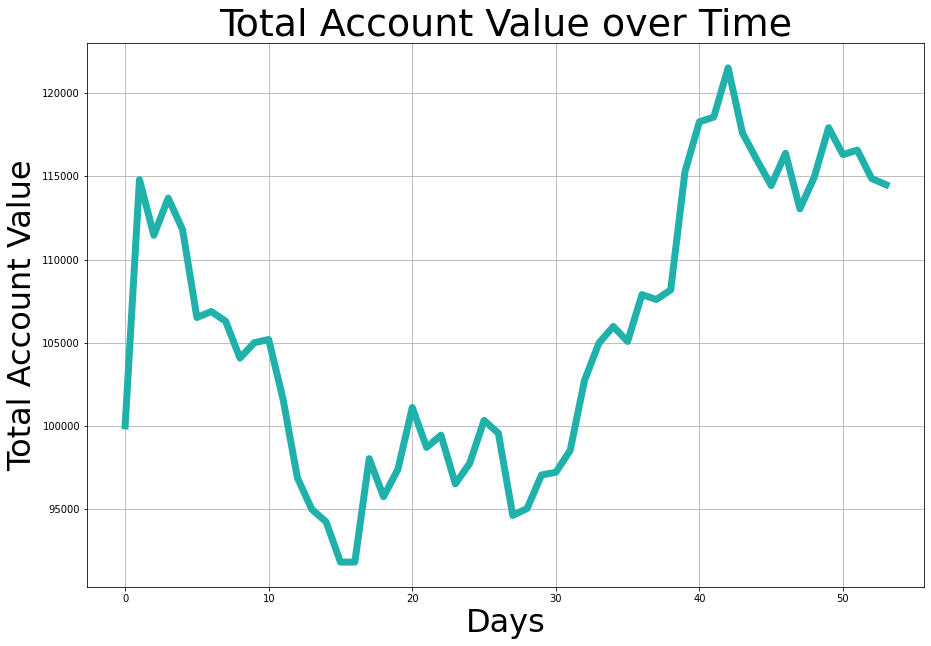

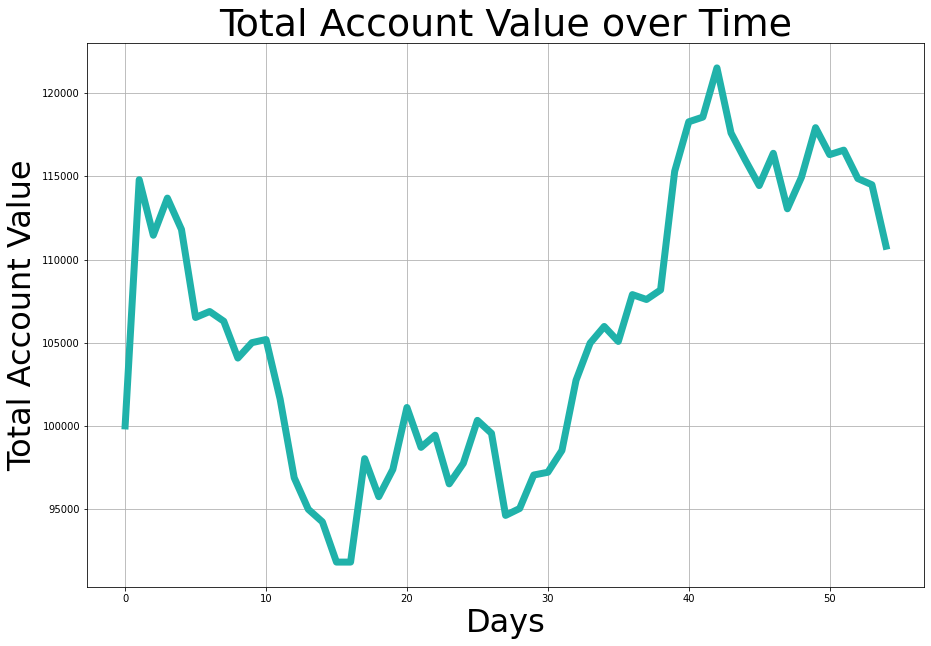

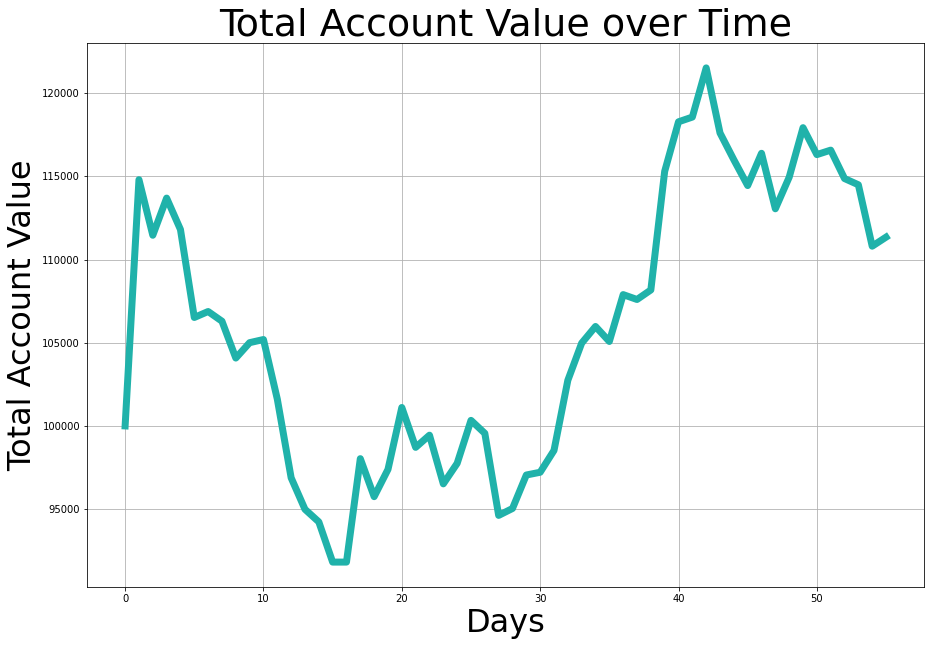

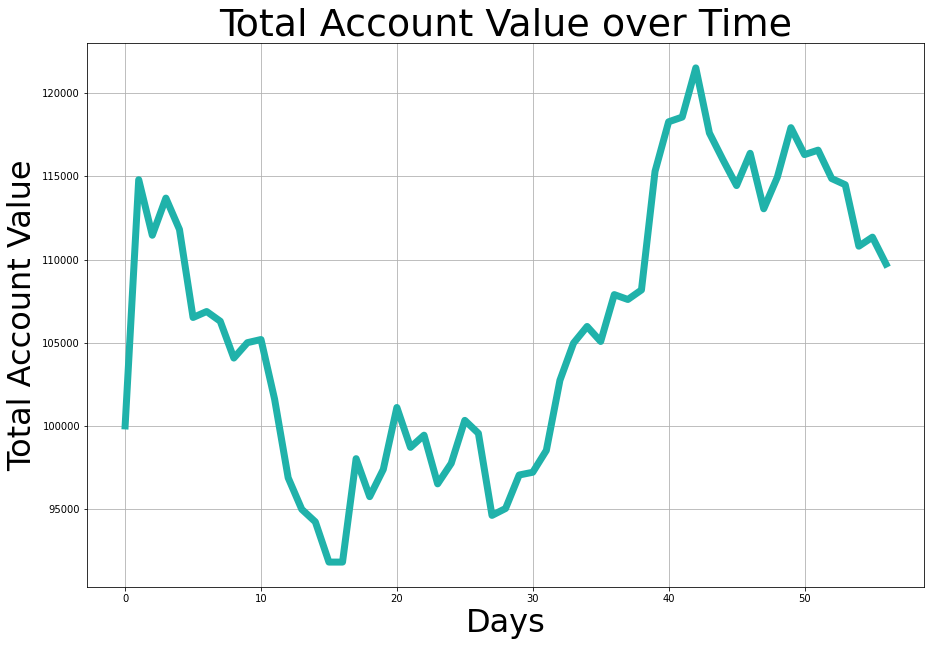

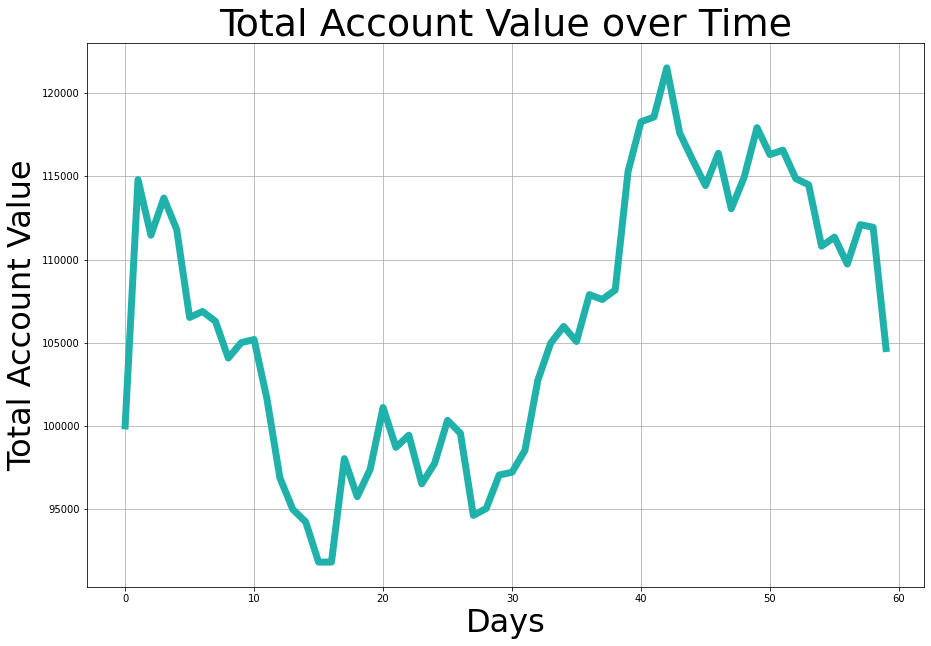

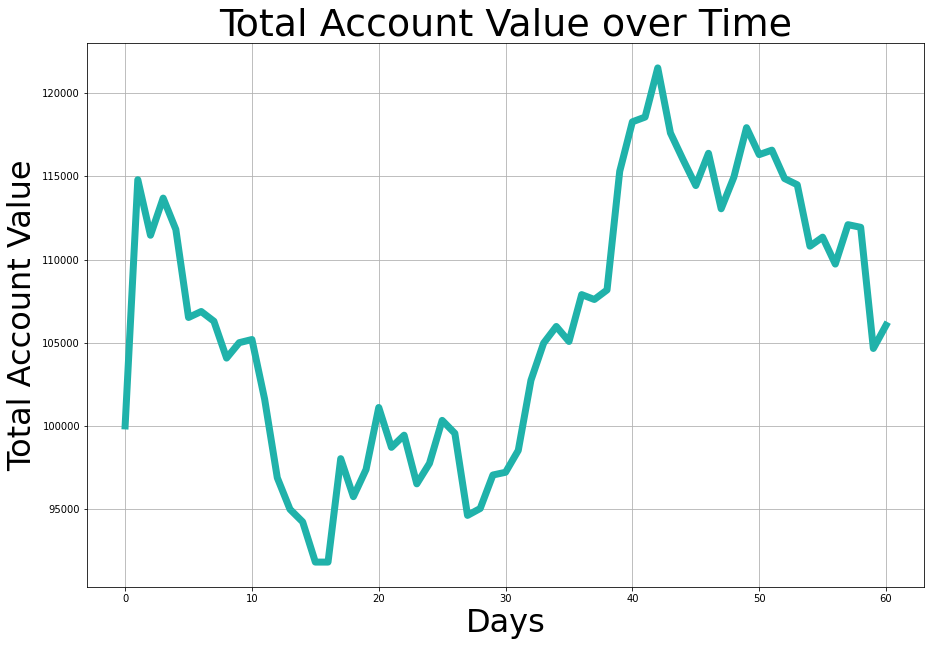

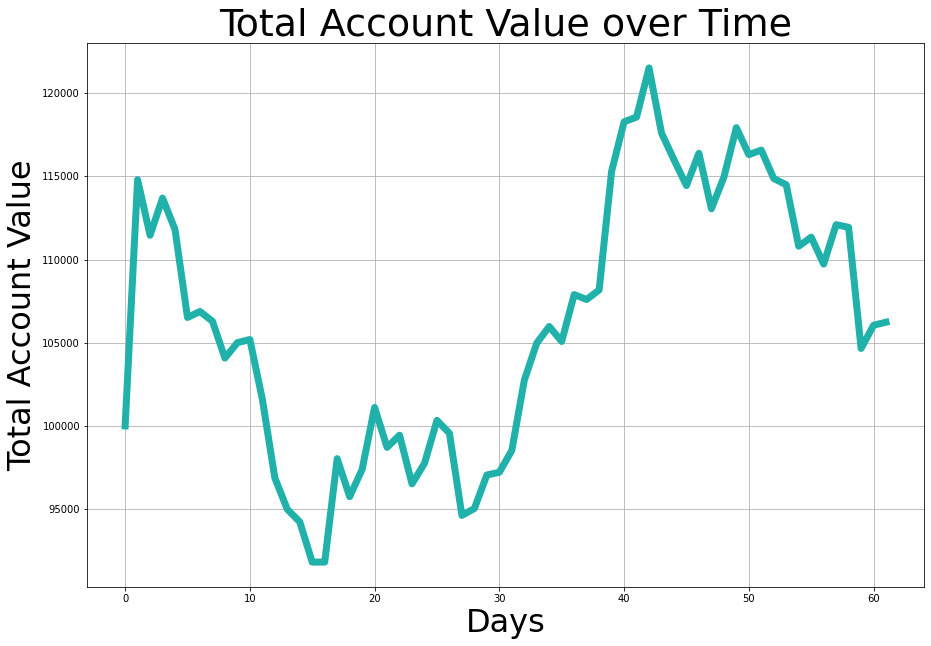

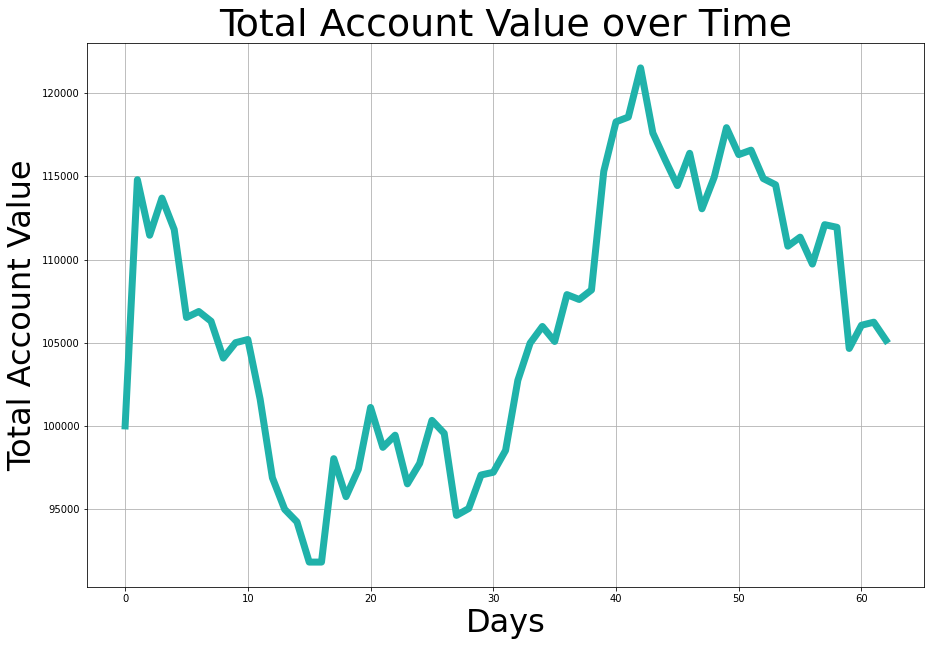

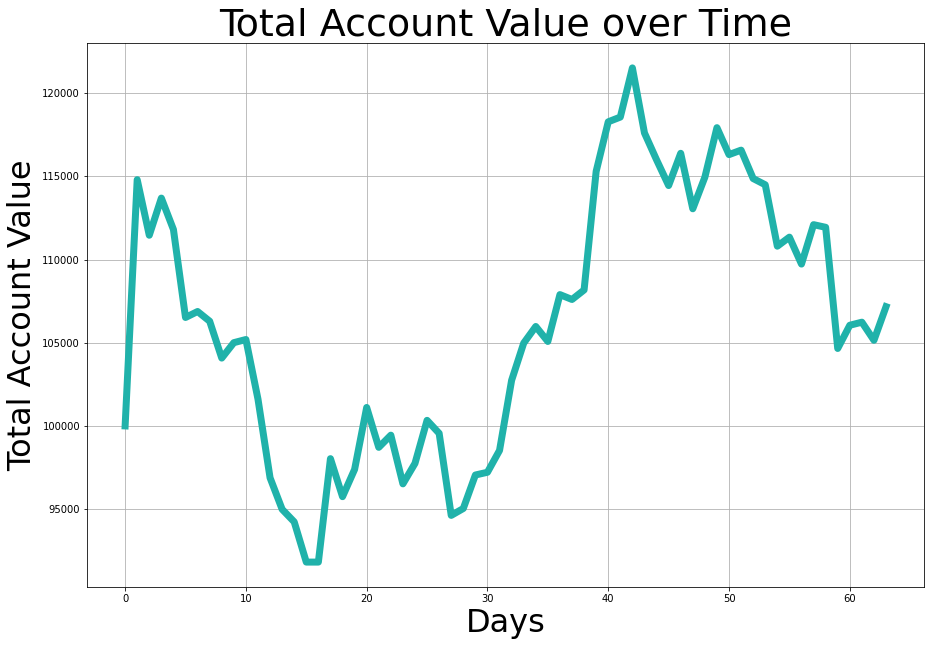

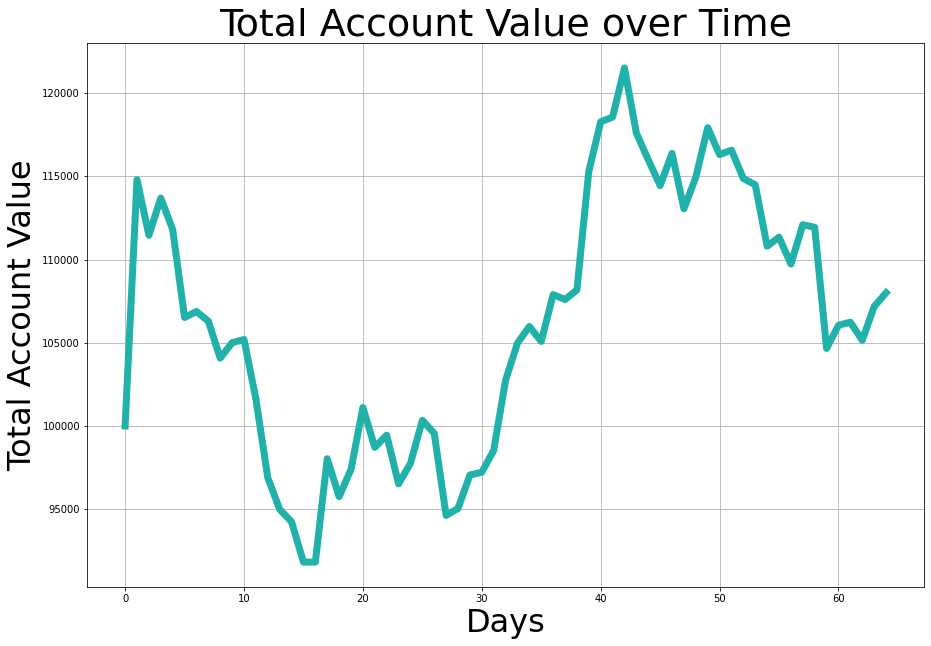

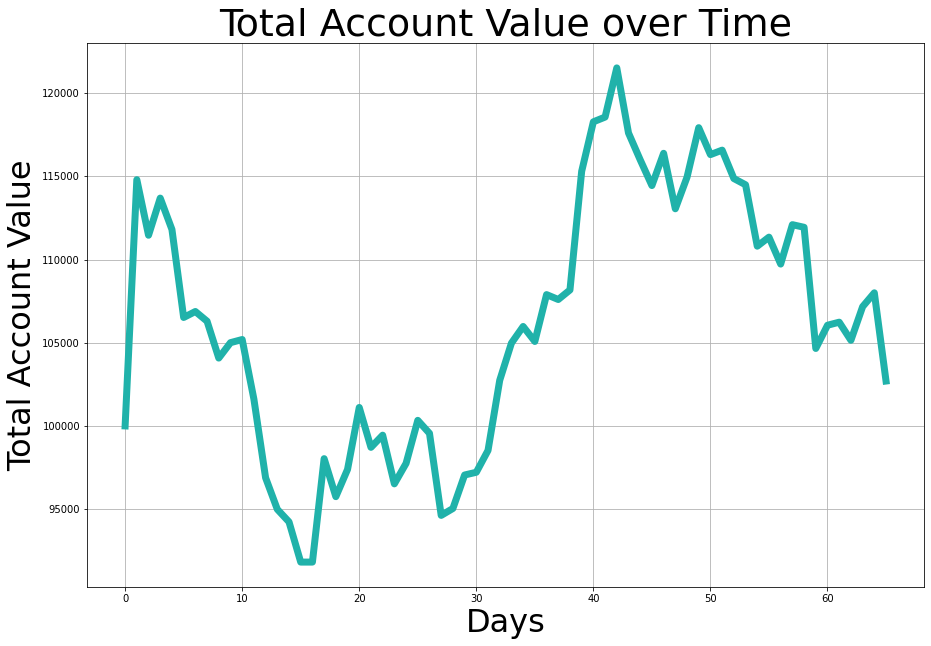

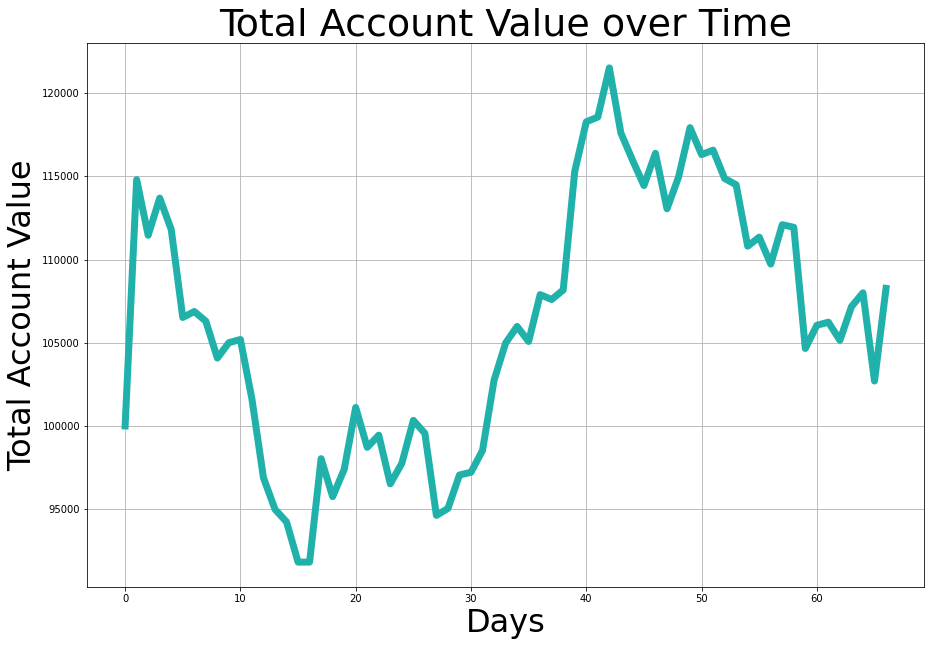

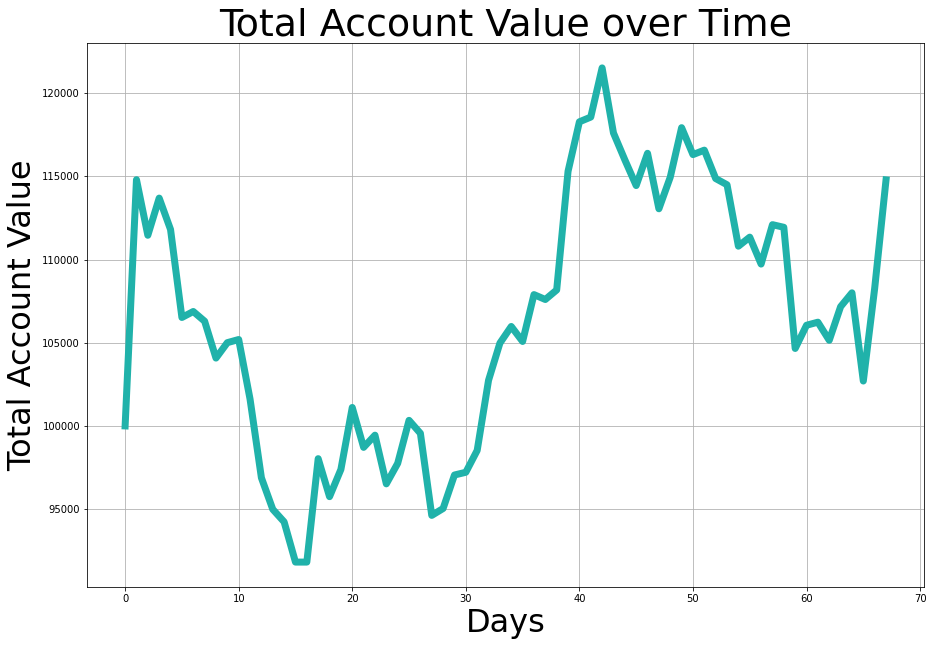

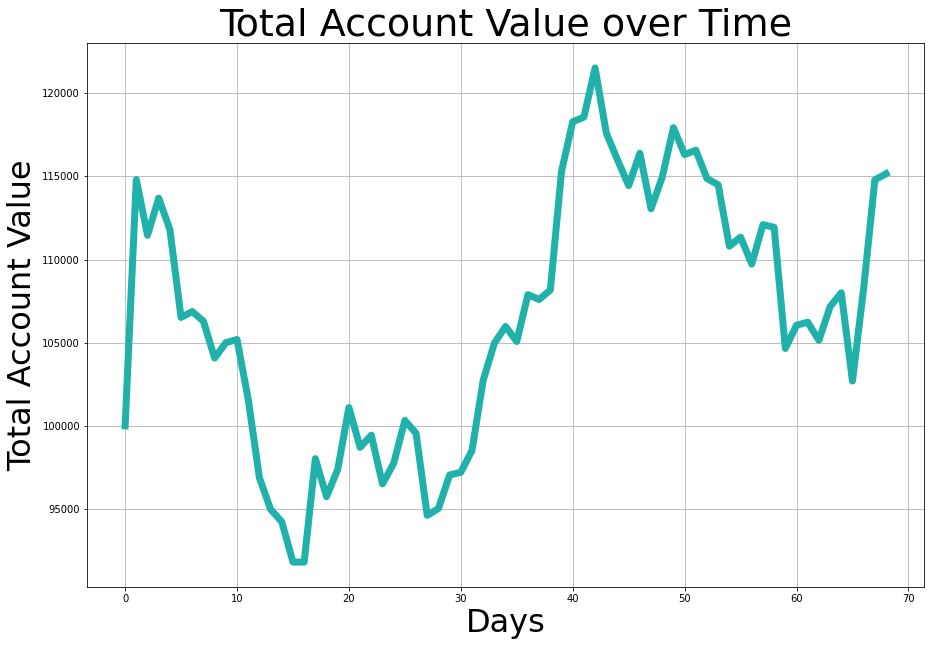

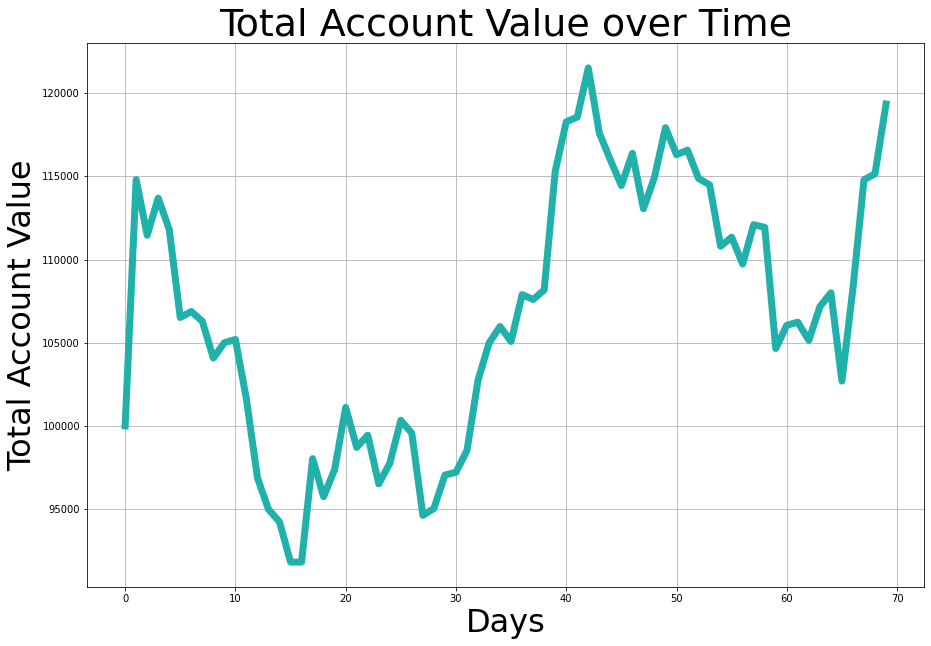

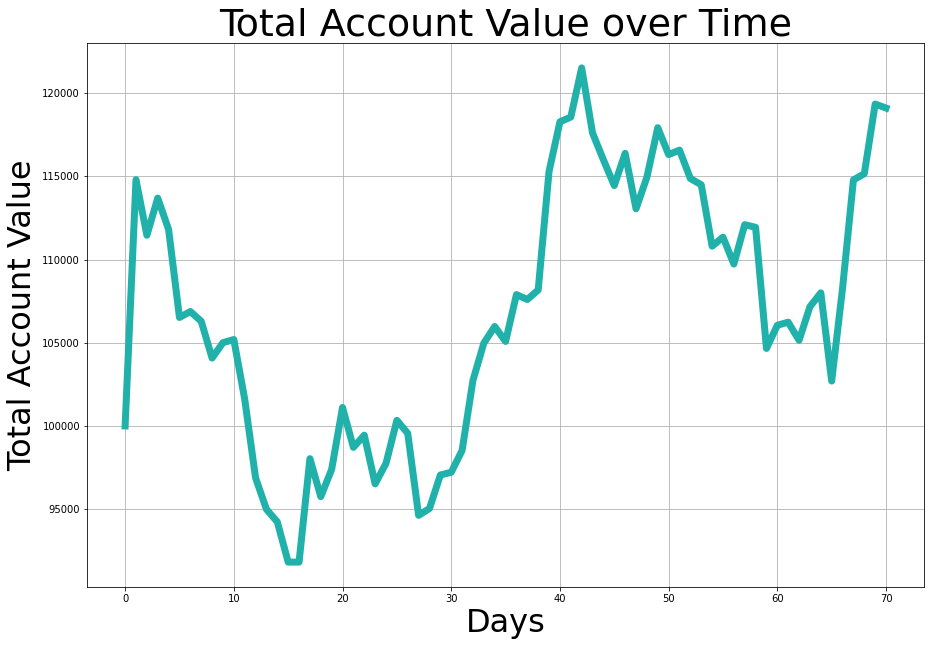

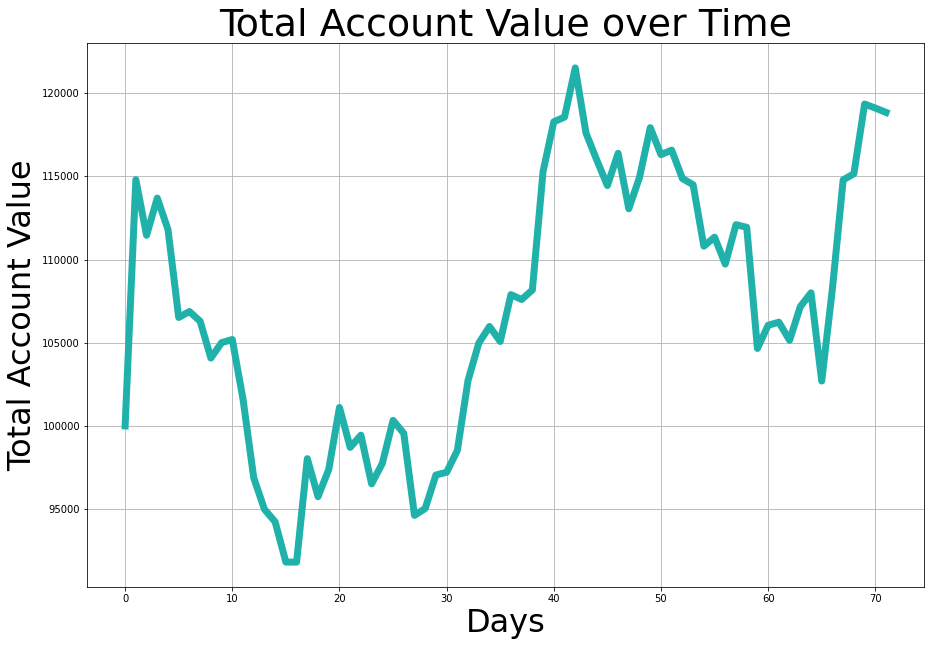

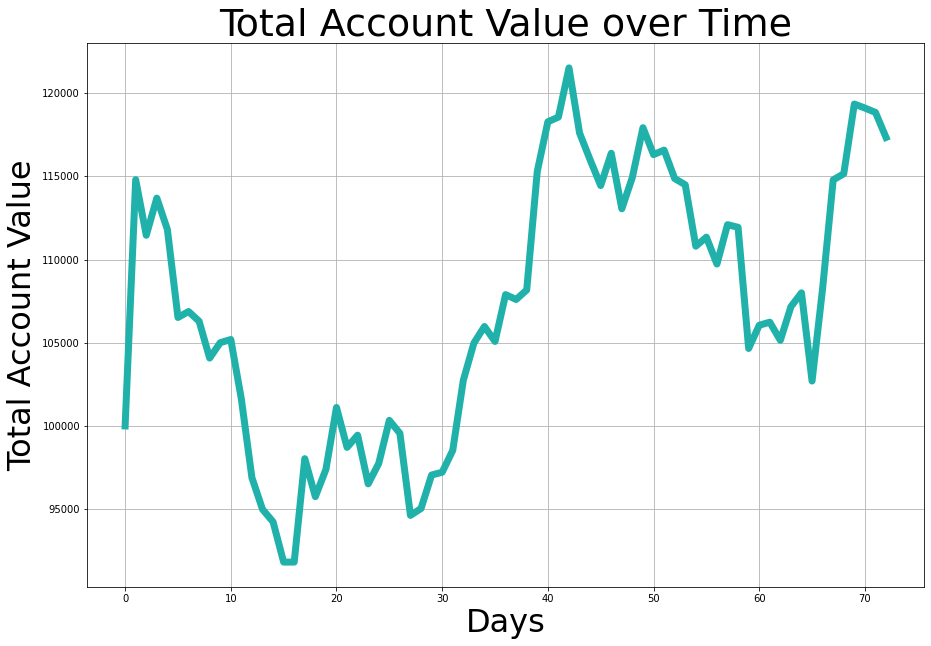

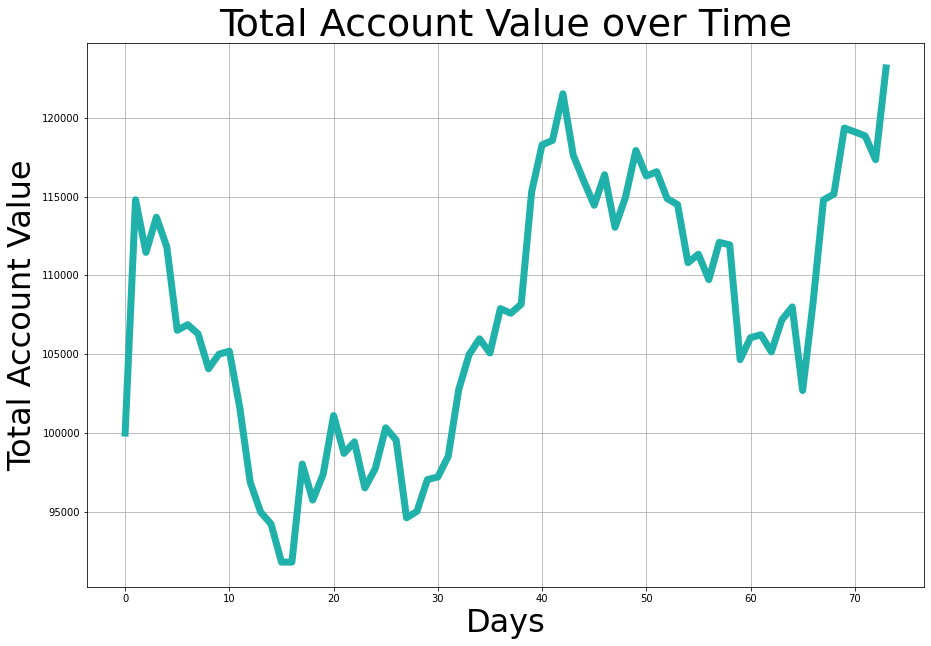

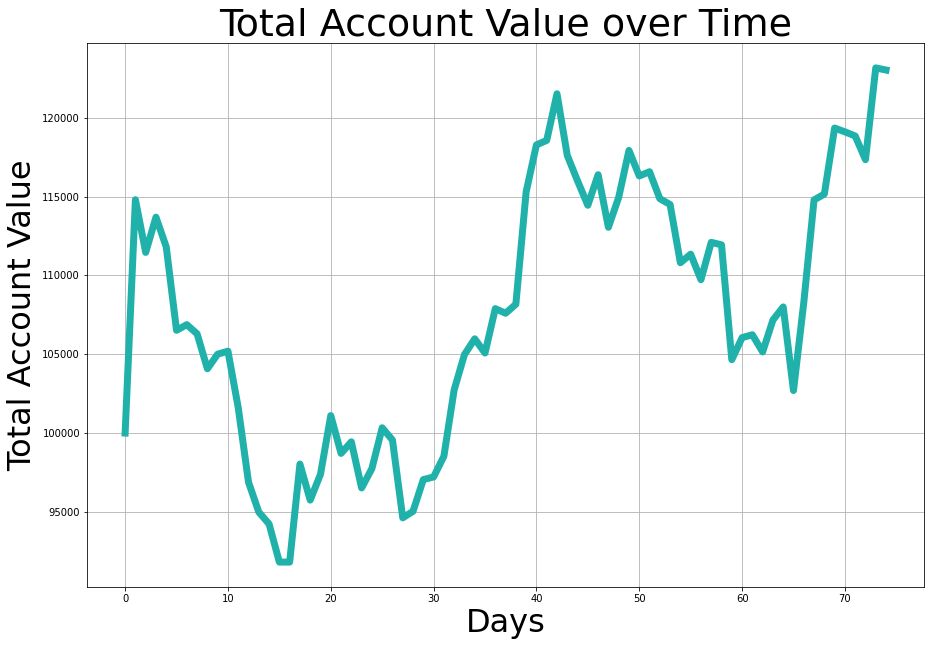

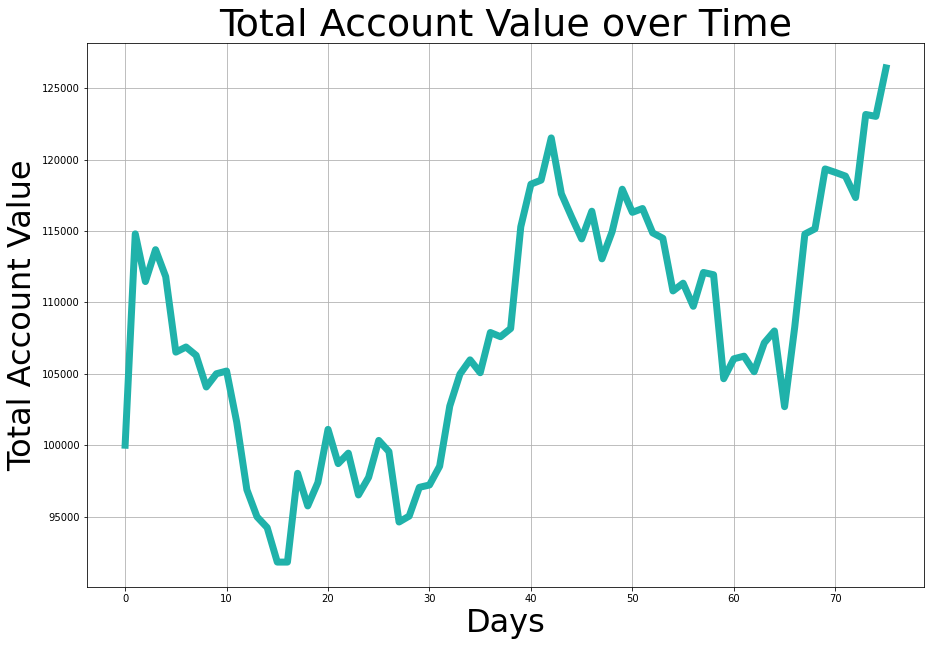

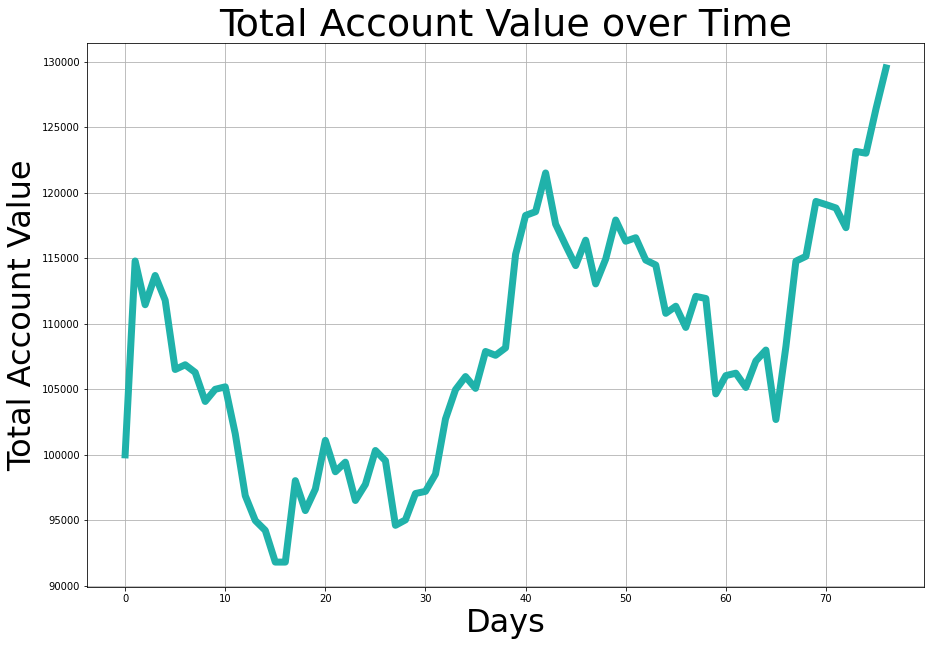

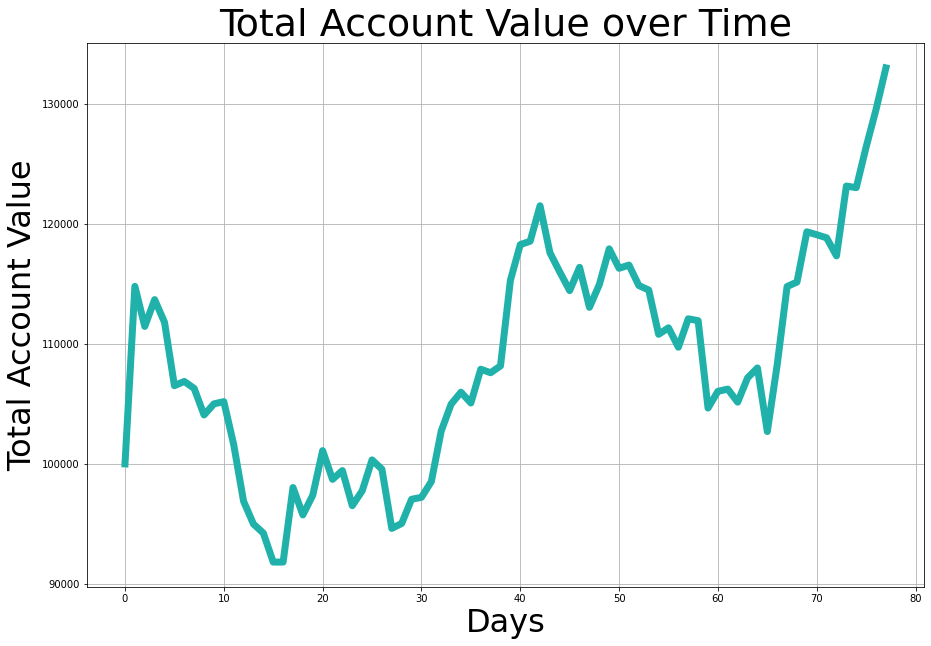

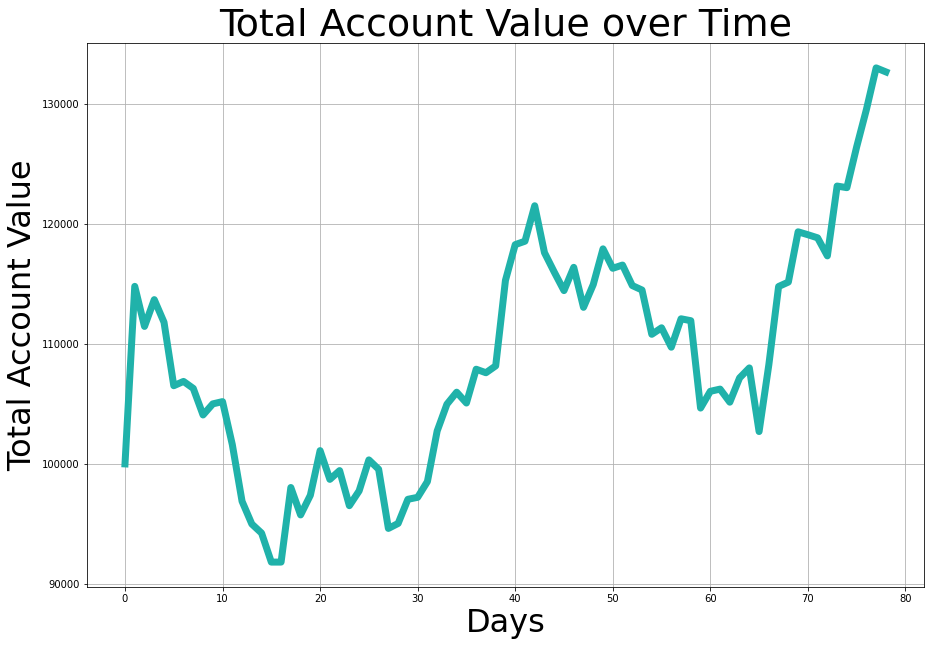

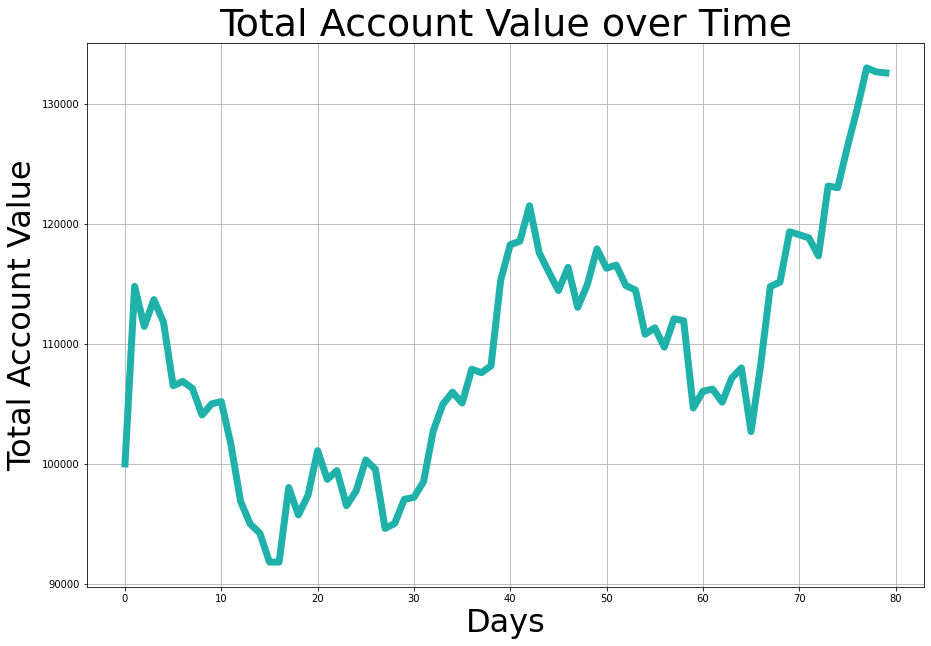

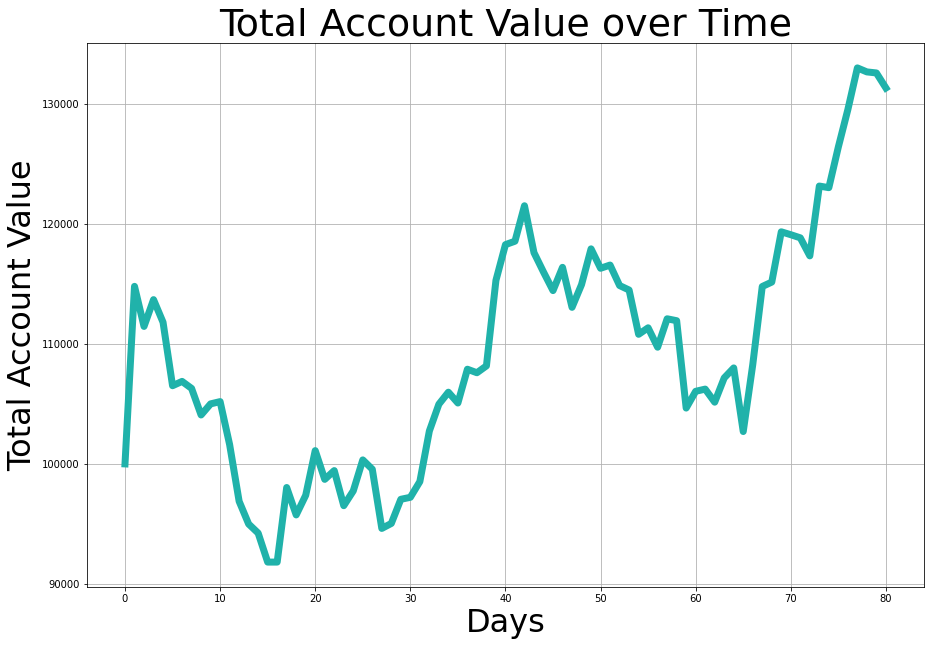

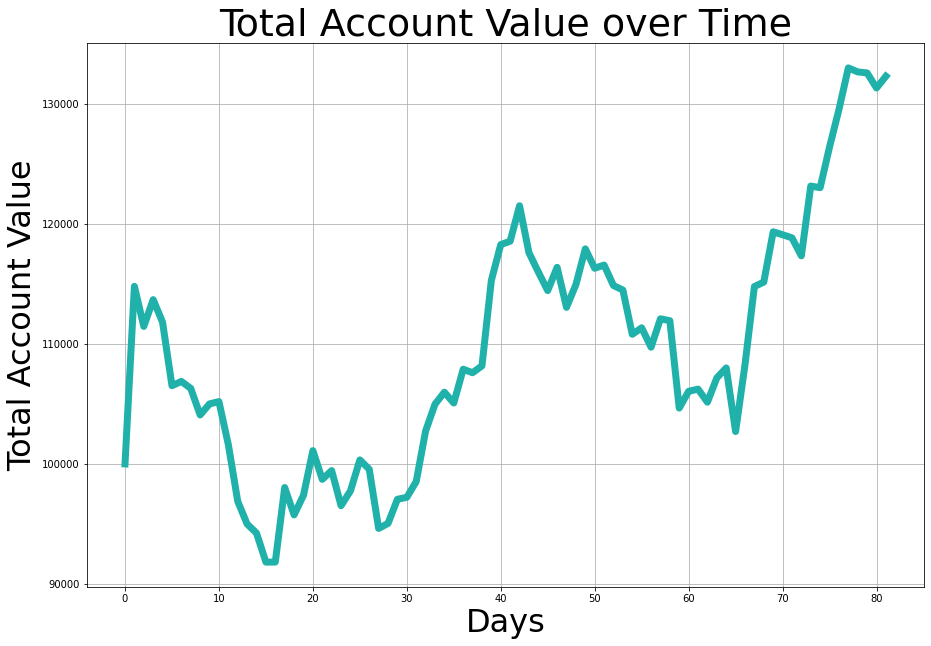

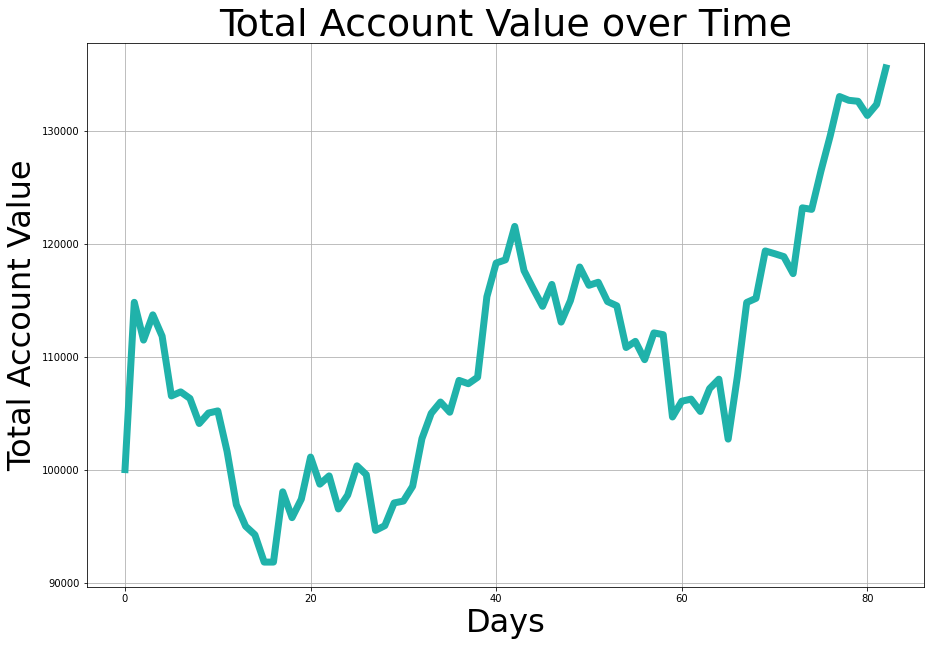

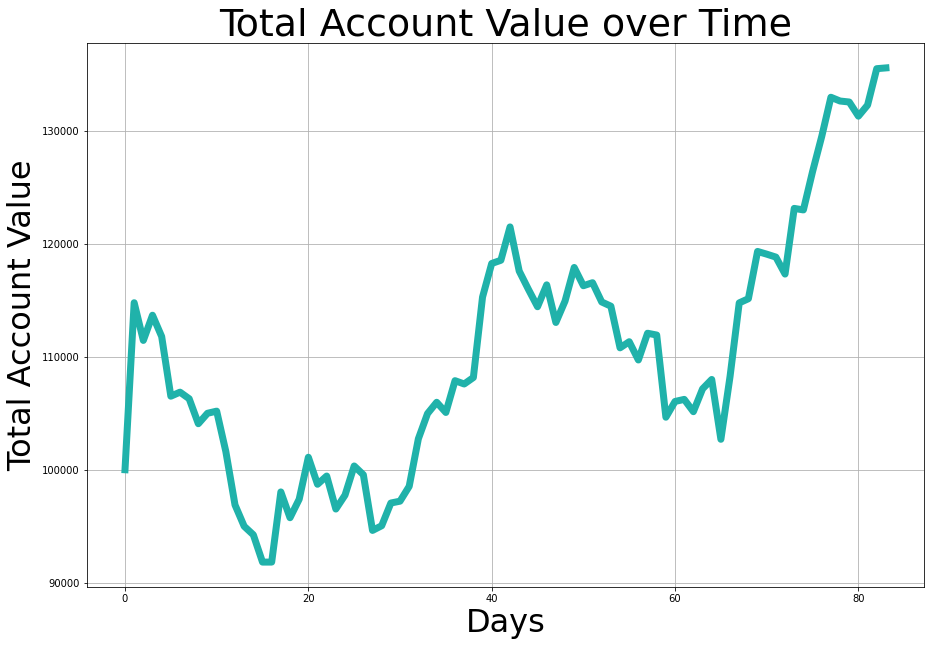

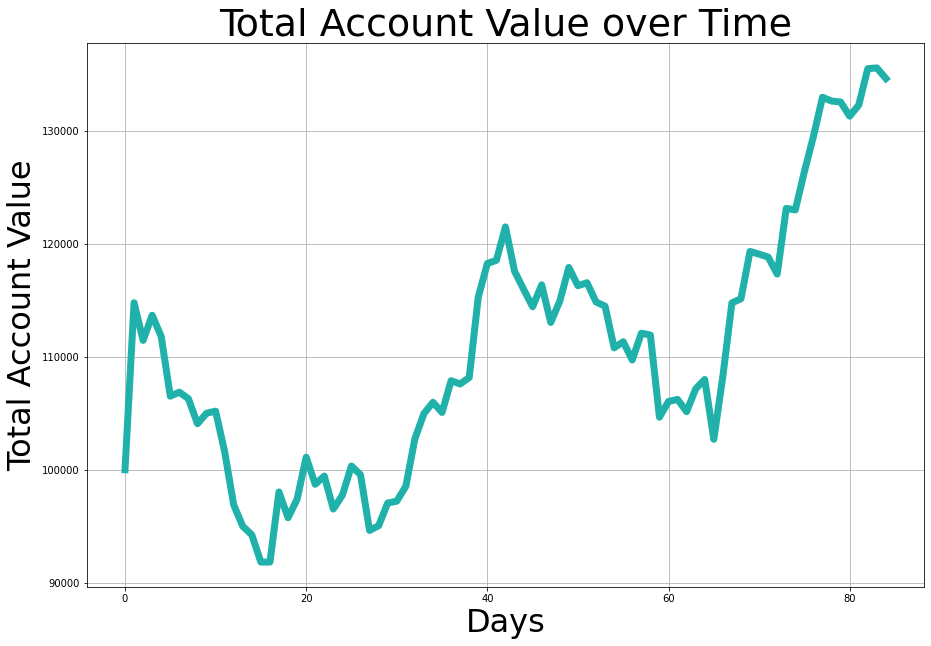

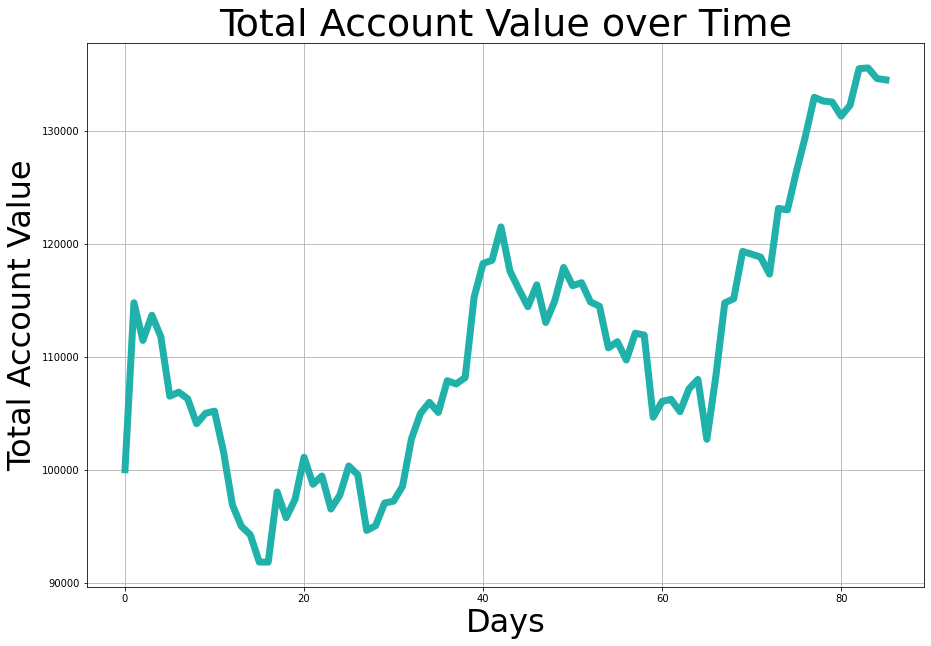

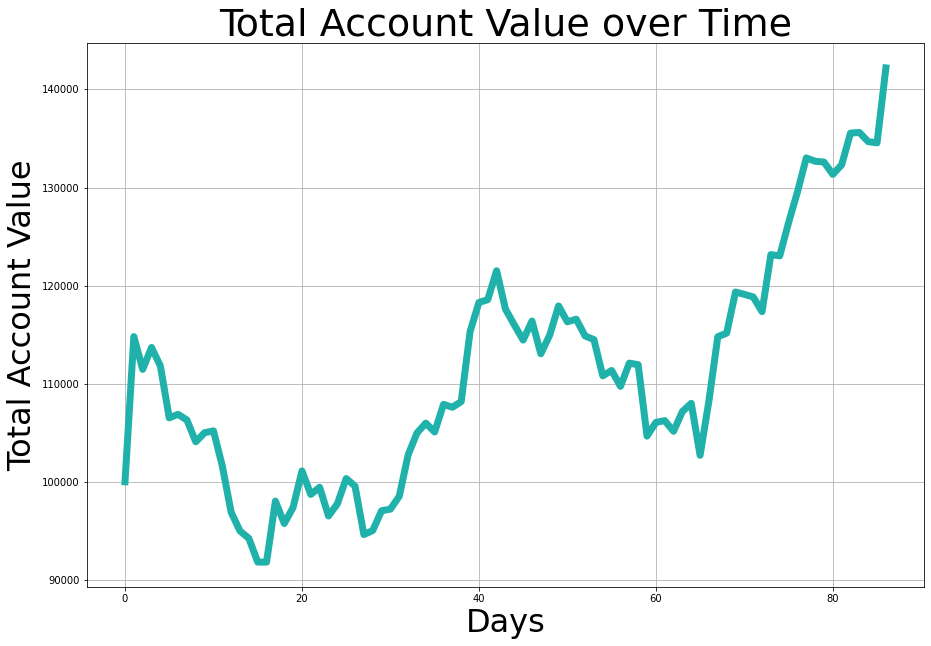

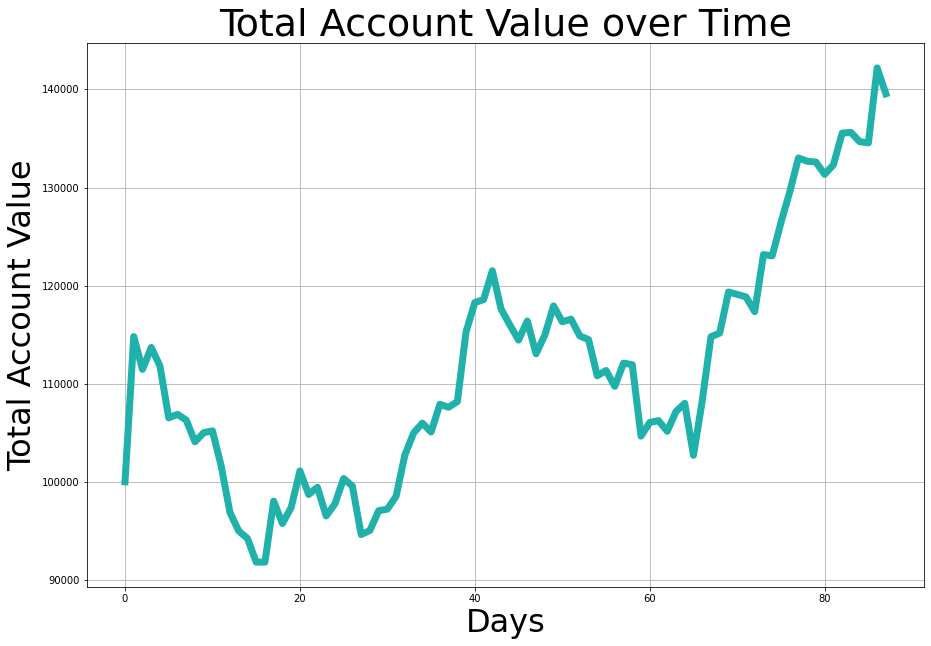

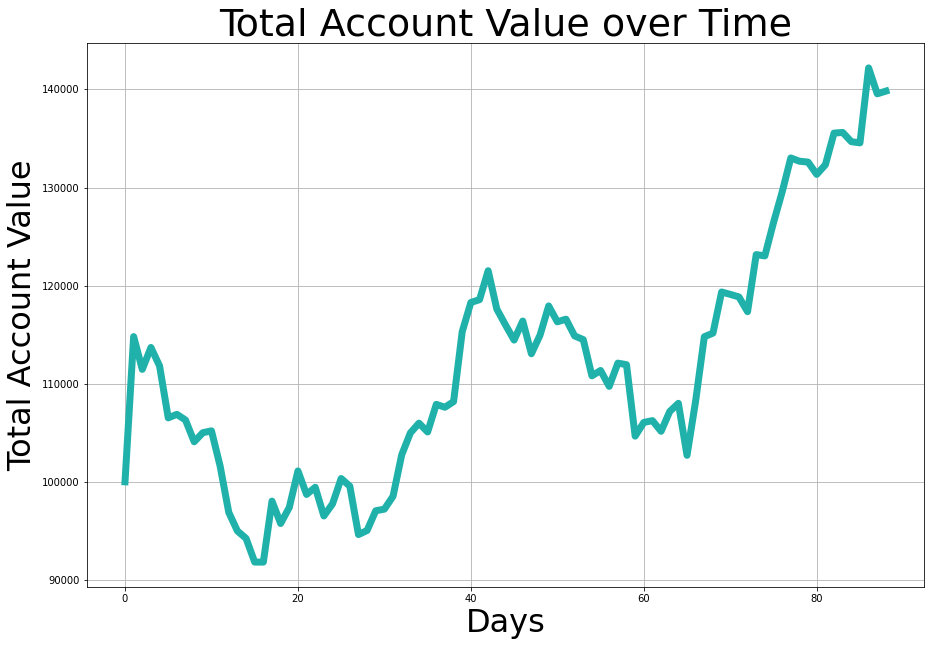

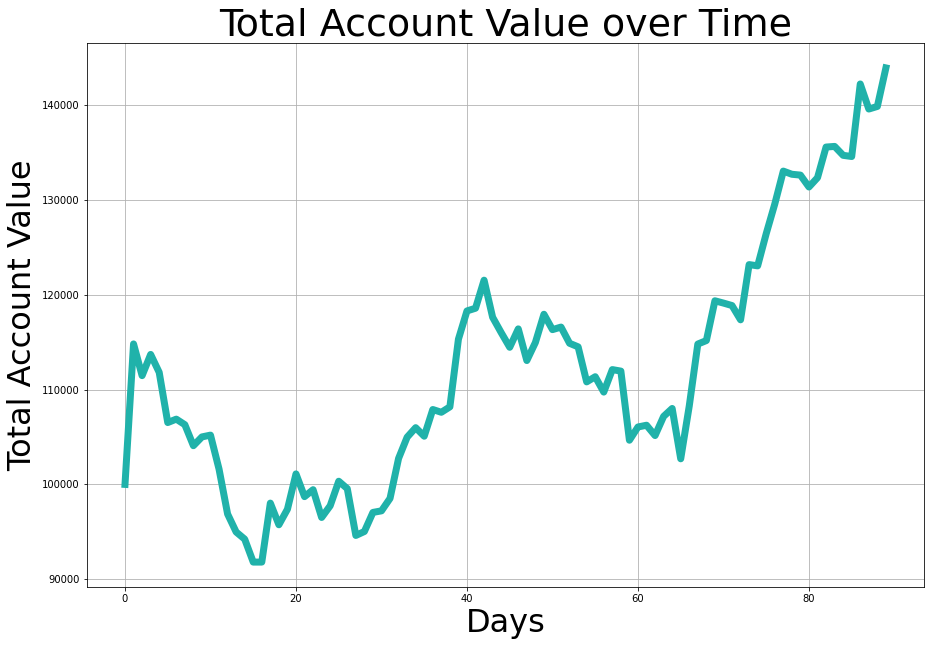

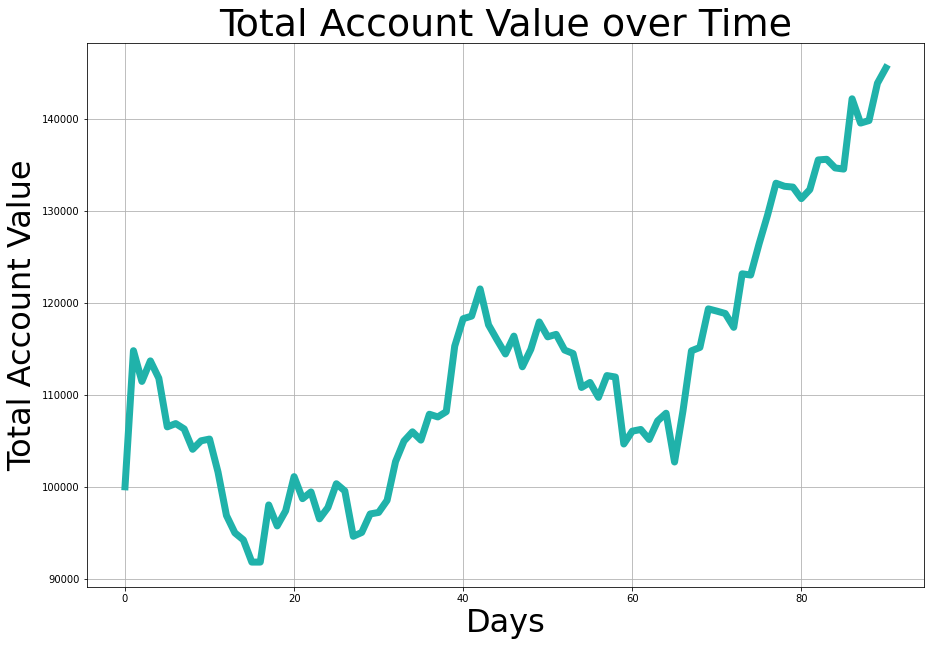

In [19]:
def mini_testing(env, agent):
    situation = False
    state, info = env.reset()
    #print(state)
    
    while not situation:
        
        agents_action = agent.get_action(state, deterministic=True)
        state, reward, situation, truncated, info = env.step(agents_action)
        #print(info)
        env.render()

env_Choice = 0
env = Environment(env_Choice)
agent = Agent(env)

train = False
env = StockTradingEnvironment(path,train = train ,number_of_days_to_consider = number_of_days)
agent = Agent(env)
mini_testing(env, agent)